<a href="https://colab.research.google.com/github/leekahhow/DataScience/blob/master/29Feb_PSI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the relevant packages
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [0]:
# mount drive so datasets can be accessed from drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#read csv from google drive after copying/pasting file path
#these are just readings of pm2.5 based on what was extracted previously from data.gov
psi_df_2016=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/psi_df_2016.csv')
psi_df_2017=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/psi_df_2017.csv')
psi_df_2018=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/psi_df_2018.csv')
psi_df_2019=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/psi_df_2019.csv')

In [0]:
#psi_df_2016['year'] = pd.DatetimeIndex(psi_df_2016['timestamp']).year
#psi_df_2016['month'] = pd.DatetimeIndex(psi_df_2016['timestamp']).month

#psi_df_2017['year'] = pd.DatetimeIndex(psi_df_2017['timestamp']).year
#psi_df_2017['month'] = pd.DatetimeIndex(psi_df_2017['timestamp']).month

#psi_df_2018['year'] = pd.DatetimeIndex(psi_df_2018['timestamp']).year
#psi_df_2018['month'] = pd.DatetimeIndex(psi_df_2018['timestamp']).month

#psi_df_2019['year'] = pd.DatetimeIndex(psi_df_2019['timestamp']).year
#psi_df_2019['month'] = pd.DatetimeIndex(psi_df_2019['timestamp']).month

#psi_df_2019

list_of_df = [psi_df_2016,psi_df_2017,psi_df_2018,psi_df_2019]
for year_df in list_of_df:
  year_df['year']= pd.DatetimeIndex(year_df['timestamp']).year
  year_df['month']= pd.DatetimeIndex(year_df['timestamp']).month

In [0]:
frames = [psi_df_2016, psi_df_2017, psi_df_2018, psi_df_2019]

psi_df_all = pd.concat(frames, ignore_index= True)
psi_df_all

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,central,east,month,national,north,south,timestamp,west,year
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016
...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019


In [0]:
median_month_all = psi_df_all.groupby(['month']).median()
median_monthyear_all = psi_df_all.groupby(['year','month']).median()
median_monthyear_all

central  east  national  north  south  west
year month                                             
2016 2           51    53        53     46     51    47
     3           57    56        59     55     58    56
     4           59    56        64     61     58    61
     5           54    52        57     56     53    52
     6           52    52        58     58     54    52
     7           51    47        57     56     52    52
     8           54    52        58     58     54    54
     9           54    53        59     58     55    53
     10          54    52        58     58     55    52
     11          52    51        54     53     52    41
     12          38    48        52     46     42    42
2017 1           42    49        51     49     45    39
     2           47    47        53     52     52    42
     3           55    55        59     56     59    53
     4           54    55        60     56     59    54
     5           45    47        55     53     54    44
     6           43    46        55     53     52    48
     7           43    48        53     53     49    50
     8           44    48        53     53     49    45
     9           52    54        58     56     52    54
     10          56    58        61     58     57    54
     11          49    54        55     53     52    41
     12          52    53        55     52     51    44
2018 1           43    47        51     46     38    36
     2           57    54        58     54     57    53
     3           51    51        55     53     54    51
     4           54    53        58     55     56    52
     5           54    51        57     55     55    47
     6           54    46        55     53     53    47
     7           57    58        62     57     62    55
     8           57    58        60     57     60    55
     9           59    57        61     59     58    59
     10          57    57        59     56     59    52
     11          52    53        54     50     52    40
     12          48    50        52     44     51    32
2019 1           46    51        52     42     52    36
     2           48    49        54     43     53    36
     3           57    56        58     53     57    53
     4           55    54        57     52     56    52
     5           52    52        54     53     51    46
     6           43    36        48     45     41    39
     7           52    53        54     52     52    53
     8           58    59        60     57     60    58
     9           73    73        76     71     75    74
     10          57    56        59     57     56    57
     11          68    69        72     70     70    63

In [0]:
mean_month_all = psi_df_all.groupby(['month']).mean()
mean_monthyear_all = psi_df_all.groupby(['year','month']).mean()
mean_monthyear_all

central       east   national      north      south       west
year month                                                                  
2016 2      47.461894  50.602771  51.443418  45.392610  48.129330  44.630485
     3      57.331746  55.444444  59.969841  54.819048  58.903175  55.336508
     4      59.666016  57.675781  64.619141  62.150391  60.427734  60.718750
     5      50.530806  49.341232  56.936809  55.200632  52.072670  51.135861
     6      49.853395  48.649691  57.638889  57.131173  51.651235  49.861111
     7      48.279389  47.267176  56.934351  56.659542  50.261069  49.854962
     8      54.378261  51.978261  63.271014  62.830435  55.302899  56.685507
     9      54.433230  53.703416  60.124224  59.074534  56.537267  50.927019
     10     53.526393  50.988270  59.589443  57.082111  55.454545  49.287390
     11     47.638889  48.741228  53.444444  51.902047  48.574561  40.973684
     12     39.661905  47.358730  49.785714  45.920635  42.090476  40.003175
2017 1      40.784343  45.180207  47.199409  45.236337  42.400295  38.540620
     2      45.644940  47.569468  51.672384  48.631218  49.825043  42.459691
     3      52.980085  52.910384  59.304410  55.139403  58.655761  49.133713
     4      52.636943  55.743631  62.324841  58.750000  60.619427  49.308917
     5      45.564774  46.205240  56.215429  53.496361  53.921397  45.919942
     6      42.984568  45.478395  53.952160  52.060185  49.075617  46.625000
     7      43.810127  46.226442  52.385373  51.136428  47.770745  46.374121
     8      43.960729  47.255259  51.892006  50.698457  46.503506  44.103787
     9      47.910015  50.259797  57.066763  55.346880  49.287373  52.910015
     10     55.409537  57.833100  60.914446  57.928471  57.244039  50.650771
     11     44.992636  52.189985  53.293078  49.696613  46.547865  41.802651
     12     46.944993  52.212976  53.672779  47.607898  47.184767  43.832158
2018 1      40.374644  44.690883  47.230769  44.492877  37.398860  35.009972
     2      57.785832  52.001647  58.535420  54.164745  56.952224  50.149918
     3      49.424615  48.635385  54.675385  51.821538  53.213846  47.993846
     4      54.960265  52.289735  58.672185  54.132450  57.016556  49.349338
     5      54.339888  48.367978  58.529494  56.223315  54.372191  46.991573
     6      53.568940  46.775036  55.490566  51.661829  52.423803  46.637155
     7      55.245053  53.920852  60.347032  54.981735  60.051750  52.943683
     8      56.617602  56.232170  59.130501  55.611533  58.556904  52.919575
     9      58.118168  55.016248  60.612999  58.500739  57.376662  57.434269
     10     56.004225  57.171831  59.723944  54.114085  58.514085  50.142254
     11     49.559124  51.529927  54.118248  48.386861  51.310949  40.618978
     12     46.450565  48.669492  50.668079  45.018362  49.105932  35.810734
2019 1      46.046444  49.059507  51.570392  43.727141  50.312046  38.490566
     2      47.857380  48.524046  53.729685  43.018242  52.210614  36.429519
     3      57.118310  56.635211  59.702817  53.352113  58.876056  51.904225
     4      52.649096  52.000000  56.271084  51.468373  54.709337  49.649096
     5      48.933709  48.643159  53.373766  50.638928  48.256700  46.826516
     6      43.352155  39.433878  47.190193  44.484398  42.839525  40.879643
     7      50.504286  52.278571  54.961429  51.411429  51.548571  52.024286
     8      59.088983  59.411017  61.403955  58.161017  60.605932  59.336158
     9      77.439592  79.551674  84.212518  76.360990  83.628821  80.107715
     10     56.337094  56.028209  59.451340  56.121298  55.318759  55.317348
     11     67.007752  69.620155  71.565891  68.542636  70.356589  64.038760

In [0]:
median_monthyear_all= pd.DataFrame(median_monthyear_all)
median_month_all=pd.DataFrame(median_month_all)

In [0]:
# subsets of yearly median
median_monthyear_all = median_monthyear_all.reset_index()
median_month_all=median_month_all.reset_index()

median_month2019_all= median_monthyear_all[median_monthyear_all['year'] == 2019]
median_month2018_all= median_monthyear_all[median_monthyear_all['year'] == 2018]
median_month2017_all= median_monthyear_all[median_monthyear_all['year'] == 2017]
median_month2016_all= median_monthyear_all[median_monthyear_all['year'] == 2016]

median_month2016_all


,year,month,central,east,national,north,south,west
0,2016,2,51,53,53,46,51,47
1,2016,3,57,56,59,55,58,56
2,2016,4,59,56,64,61,58,61
3,2016,5,54,52,57,56,53,52
4,2016,6,52,52,58,58,54,52
5,2016,7,51,47,57,56,52,52
6,2016,8,54,52,58,58,54,54
7,2016,9,54,53,59,58,55,53
8,2016,10,54,52,58,58,55,52
9,2016,11,52,51,54,53,52,41


In [0]:
mean_monthyear_all= pd.DataFrame(mean_monthyear_all)
mean_month_all=pd.DataFrame(mean_month_all)
# subsets of yearly median
mean_monthyear_all = mean_monthyear_all.reset_index()
mean_month_all=mean_month_all.reset_index()

mean_month2019_all= mean_monthyear_all[mean_monthyear_all['year'] == 2019]
mean_month2018_all= mean_monthyear_all[mean_monthyear_all['year'] == 2018]
mean_month2017_all= mean_monthyear_all[mean_monthyear_all['year'] == 2017]
mean_month2016_all= mean_monthyear_all[mean_monthyear_all['year'] == 2016]

mean_month2016_all

,year,month,central,east,national,north,south,west
0,2016,2,47.461894,50.602771,51.443418,45.392610,48.129330,44.630485
1,2016,3,57.331746,55.444444,59.969841,54.819048,58.903175,55.336508
2,2016,4,59.666016,57.675781,64.619141,62.150391,60.427734,60.718750
3,2016,5,50.530806,49.341232,56.936809,55.200632,52.072670,51.135861
4,2016,6,49.853395,48.649691,57.638889,57.131173,51.651235,49.861111
5,2016,7,48.279389,47.267176,56.934351,56.659542,50.261069,49.854962
6,2016,8,54.378261,51.978261,63.271014,62.830435,55.302899,56.685507
7,2016,9,54.433230,53.703416,60.124224,59.074534,56.537267,50.927019
8,2016,10,53.526393,50.988270,59.589443,57.082111,55.454545,49.287390
9,2016,11,47.638889,48.741228,53.444444,51.902047,48.574561,40.973684


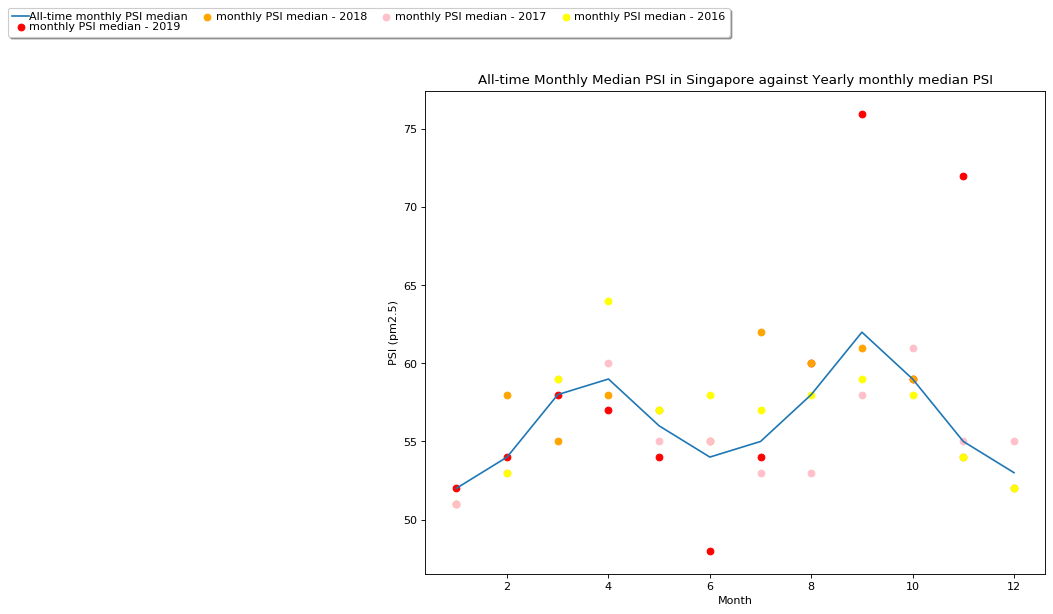

In [0]:
#visualization of monthly PSI for each year (scatter), and all-time median PSI by month (line) 
#will have to fix x-axis labels first before visualizing subplots
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


plt.plot(median_month_all['month'],median_month_all['national'], label='All-time monthly PSI median')
median_2019= plt.scatter(median_month2019_all['month'],median_month2019_all['national'], c='red',label='monthly PSI median - 2019')
median_2018= plt.scatter(median_month2018_all['month'],median_month2018_all['national'], c='orange',label='monthly PSI median - 2018')
median_2017= plt.scatter(median_month2017_all['month'],median_month2017_all['national'], c='pink',label='monthly PSI median - 2017')
median_2016= plt.scatter(median_month2016_all['month'],median_month2016_all['national'], c='yellow',label='monthly PSI median - 2016')

#plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
# A hacky way to do it but basically (0 start, 9000 is the number of entries, and 672 is the skips)
#plt.xticks(np.arange(0, 9000, 672)) 
# Add title and axis names
plt.title('All-time Monthly Median PSI in Singapore against Yearly monthly median PSI')
plt.xlabel('Month')
plt.ylabel('PSI (pm2.5)')
plt.show()

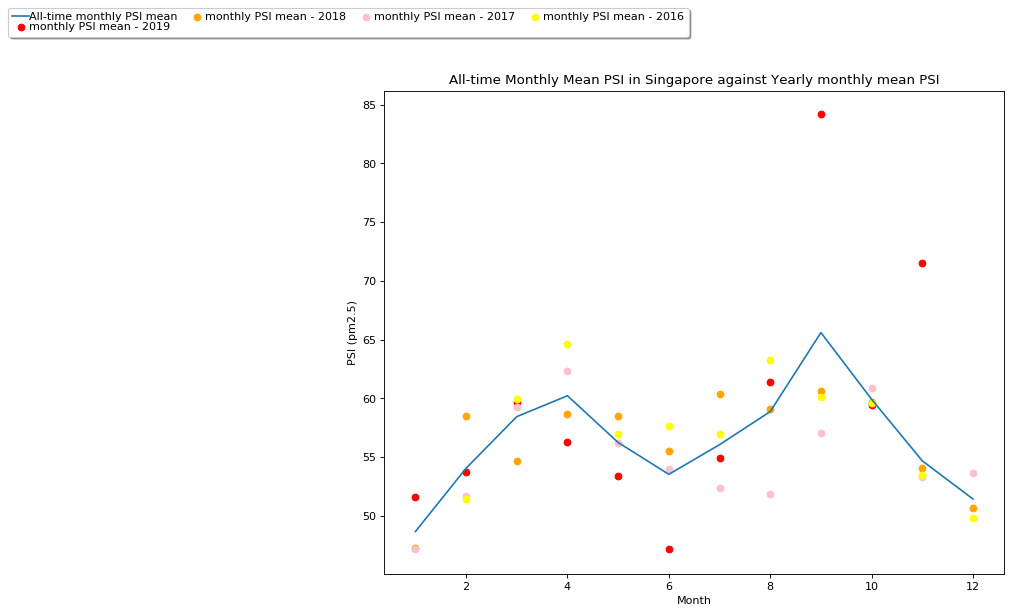

In [0]:
#visualization of monthly PSI for each year (scatter), and all-time median PSI by month (line) 
#will have to fix x-axis labels first before visualizing subplots
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


plt.plot(mean_month_all['month'],mean_month_all['national'], label='All-time monthly PSI mean')
mean_2019= plt.scatter(mean_month2019_all['month'],mean_month2019_all['national'], c='red',label='monthly PSI mean - 2019')
mean_2018= plt.scatter(mean_month2018_all['month'],mean_month2018_all['national'], c='orange',label='monthly PSI mean - 2018')
mean_2017= plt.scatter(mean_month2017_all['month'],mean_month2017_all['national'], c='pink',label='monthly PSI mean - 2017')
mean_2016= plt.scatter(mean_month2016_all['month'],mean_month2016_all['national'], c='yellow',label='monthly PSI mean - 2016')

#plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
# A hacky way to do it but basically (0 start, 9000 is the number of entries, and 672 is the skips)
#plt.xticks(np.arange(0, 9000, 672)) 
# Add title and axis names
plt.title('All-time Monthly Mean PSI in Singapore against Yearly monthly mean PSI')
plt.xlabel('Month')
plt.ylabel('PSI (pm2.5)')
plt.show()

In [0]:
#check dataset
psi_df_2016.head()

,national,south,north,east,central,west,timestamp,year,month
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00,2016,2
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00,2016,2
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00,2016,2
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00,2016,2
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00,2016,2


In [0]:
# select relevant columns for median and mean calculation
x = ['national', 'south', 'north', 'east', 'central'] 


list_of_df = [psi_df_2016,psi_df_2017,psi_df_2018,psi_df_2019]
for year_df in list_of_df:
  year_df['mean']=year_df[x].mean(axis=1, skipna=True)
  year_df['median']=year_df[x].median(axis=1, skipna=True)
psi_df_2016.head(100)

#psi_df_all

,national,south,north,east,central,west,timestamp,year,month,mean,median
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00,2016,2,44.4,47.0
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00,2016,2,57.2,57.0
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00,2016,2,57.4,57.0
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00,2016,2,57.2,57.0
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00,2016,2,57.4,58.0
...,...,...,...,...,...,...,...,...,...,...,...
95,51,49,37,39,51,39,2016-02-13T06:00:00+08:00,2016,2,45.4,49.0
96,51,49,37,39,51,38,2016-02-13T07:00:00+08:00,2016,2,45.4,49.0
97,51,48,36,43,51,38,2016-02-13T08:00:00+08:00,2016,2,45.8,48.0
98,51,48,36,39,51,37,2016-02-13T09:00:00+08:00,2016,2,45.0,48.0


In [0]:
x = ['national', 'south', 'north', 'east', 'central'] 
psi_df_all['mean']=psi_df_all[x].mean(axis=1, skipna=True)
psi_df_all['median']=psi_df_all[x].median(axis=1, skipna=True)
psi_df_all

,central,east,month,national,north,south,timestamp,west,year,mean,median
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0
...,...,...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019,74.6,74.0
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019,73.8,73.0
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019,73.8,73.0
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019,74.4,73.0


In [0]:
import datetime
psi_df_2016['day']=psi_df_2016['timestamp']
psi_df_all['day']=psi_df_all['timestamp']
#the following is just an attempt to do it for a single row which helps to structure thoughts about doing it for all the rows
#example=psi_df_2016['day'][1]
#example2=psi_df_2016['day'][2]
#print(example)
#datetime_example = datetime.datetime.strptime(example, "%Y-%m-%dT%H:%M:%W+08:00")
#datetime_example2 = datetime.datetime.strptime(example2, "%Y-%m-%dT%H:%M:%W+08:00")
#print(datetime_example)
#print(datetime_example2)
#print(type(datetime_example))
#print(datetime_example.weekday())
#print(datetime_example2.weekday())
#print(datetime_example2.hour())
#psi_df_2016.head(100)
psi_df_all

,central,east,month,national,north,south,timestamp,west,year,mean,median,day
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,2016-02-07T18:00:00+08:00
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,2016-02-08T23:00:00+08:00
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,2016-02-09T01:00:00+08:00
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,2016-02-09T02:00:00+08:00
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,2016-02-09T03:00:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019,74.6,74.0,2019-11-06T10:00:00+08:00
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019,73.8,73.0,2019-11-06T11:00:00+08:00
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019,73.8,73.0,2019-11-06T12:00:00+08:00
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019,74.4,73.0,2019-11-06T13:00:00+08:00


In [0]:
def convert_to_string(x):
  x=datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%W+08:00")
  return x
psi_df_2016['day']=psi_df_2016['day'].apply(convert_to_string)
psi_df_all['day']=psi_df_all['day'].apply(convert_to_string)
print(psi_df_2016['day'])
print(psi_df_all['day'])

0      2016-02-07 18:00:00
1      2016-02-08 23:00:00
2      2016-02-09 01:00:00
3      2016-02-09 02:00:00
4      2016-02-09 03:00:00
               ...        
6836   2016-12-31 19:00:00
6837   2016-12-31 20:00:00
6838   2016-12-31 21:00:00
6839   2016-12-31 22:00:00
6840   2016-12-31 23:00:00
Name: day, Length: 6841, dtype: datetime64[ns]
0       2016-02-07 18:00:00
1       2016-02-08 23:00:00
2       2016-02-09 01:00:00
3       2016-02-09 02:00:00
4       2016-02-09 03:00:00
                ...        
30017   2019-11-06 10:00:00
30018   2019-11-06 11:00:00
30019   2019-11-06 12:00:00
30020   2019-11-06 13:00:00
30021   2019-11-06 14:00:00
Name: day, Length: 30022, dtype: datetime64[ns]


In [0]:
import calendar
def convert_to_day(x):
  x=calendar.day_name[x.weekday()]
  return x
psi_df_2016['day']=psi_df_2016['day'].apply(convert_to_day)
psi_df_all['day']=psi_df_all['day'].apply(convert_to_day)

In [0]:
#confirm that the output is right
print(psi_df_2016['day'])
print(psi_df_all['day'])

0         Sunday
1         Monday
2        Tuesday
3        Tuesday
4        Tuesday
          ...   
6836    Saturday
6837    Saturday
6838    Saturday
6839    Saturday
6840    Saturday
Name: day, Length: 6841, dtype: object
0           Sunday
1           Monday
2          Tuesday
3          Tuesday
4          Tuesday
           ...    
30017    Wednesday
30018    Wednesday
30019    Wednesday
30020    Wednesday
30021    Wednesday
Name: day, Length: 30022, dtype: object


In [0]:
#create one-hot encoding 
pd.get_dummies(psi_df_2016['day'], drop_first=True)
psi_df_2016_2 = pd.concat([psi_df_2016, pd.get_dummies(psi_df_2016['day'])], axis=1); psi_df_2016
psi_df_2016_2
#should drop one column to reduce collinearity
pd.get_dummies(psi_df_all['day'], drop_first=True)
psi_df_all_2 = pd.concat([psi_df_all, pd.get_dummies(psi_df_all['day'])], axis=1); psi_df_all
psi_df_all_2

,central,east,month,national,north,south,timestamp,west,year,mean,median,day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,Sunday,0,0,0,1,0,0,0
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,Monday,0,1,0,0,0,0,0
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,Tuesday,0,0,0,0,0,1,0
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,Tuesday,0,0,0,0,0,1,0
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,Tuesday,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019,74.6,74.0,Wednesday,0,0,0,0,0,0,1
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019,73.8,73.0,Wednesday,0,0,0,0,0,0,1
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019,73.8,73.0,Wednesday,0,0,0,0,0,0,1
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019,74.4,73.0,Wednesday,0,0,0,0,0,0,1


In [0]:
#added column with hours
import datetime
psi_df_2016_2['hour'] = psi_df_2016['timestamp'].apply(convert_to_string)
psi_df_2016_2['hour'] = psi_df_2016_2['hour'].dt.hour
#psi_df_2016_2.head()
psi_df_all_2['hour'] = psi_df_all['timestamp'].apply(convert_to_string)
psi_df_all_2['hour'] = psi_df_all_2['hour'].dt.hour
psi_df_all_2.head()

,central,east,month,national,north,south,timestamp,west,year,mean,median,day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hour
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,Sunday,0,0,0,1,0,0,0,18
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,Monday,0,1,0,0,0,0,0,23
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,Tuesday,0,0,0,0,0,1,0,1
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,Tuesday,0,0,0,0,0,1,0,2
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,Tuesday,0,0,0,0,0,1,0,3


In [0]:
#one-hot encoding for hours
pd.get_dummies(psi_df_2016_2['hour'], drop_first=True)
psi_df_2016_3 = pd.concat([psi_df_2016_2, pd.get_dummies(psi_df_2016_2['hour'])], axis=1); psi_df_2016_2
psi_df_2016_3.head()
#drop one column to reduce collinearity
psi_df_2016_3=psi_df_2016_3.drop(['day','Monday','hour'],axis=1)

In [0]:
#one-hot encoding for hours
pd.get_dummies(psi_df_all_2['hour'], drop_first=True)
psi_df_all_3 = pd.concat([psi_df_all_2, pd.get_dummies(psi_df_all_2['hour'])], axis=1); psi_df_2016_2
psi_df_all_3.head()
#drop one column to reduce collinearity
psi_df_all_3=psi_df_all_3.drop(['day','Monday','hour'],axis=1)

In [0]:
psi_df_2016_3.head()

,national,south,north,east,central,west,timestamp,year,month,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00,2016,2,44.4,47.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00,2016,2,57.2,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00,2016,2,57.4,57.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00,2016,2,57.2,57.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00,2016,2,57.4,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
psi_df_all_3

,central,east,month,national,north,south,timestamp,west,year,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30017,74,72,11,78,71,78,2019-11-06T10:00:00+08:00,76,2019,74.6,74.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
30018,73,71,11,77,71,77,2019-11-06T11:00:00+08:00,75,2019,73.8,73.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
30019,73,71,11,77,71,77,2019-11-06T12:00:00+08:00,74,2019,73.8,73.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
30020,73,72,11,78,71,78,2019-11-06T13:00:00+08:00,74,2019,74.4,73.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
X = psi_df_2016_3.iloc[:, 11:40].values
y = psi_df_2016_3.iloc[:, 10].values
#print(psi_df_2016_3.head())
print (y)

[47. 57. 57. ... 32. 33. 34.]


In [0]:
# try selecting a different set of variables to fit model 
#create one-hot encoding 
pd.get_dummies(psi_df_2016_3['month'],prefix ='month', drop_first=True)
psi_df_2016_4 = pd.concat([psi_df_2016_3, pd.get_dummies(psi_df_2016_3['month'],prefix ='month')], axis=1); psi_df_2016


psi_df_2016_4['day_of_month']= psi_df_2016_4['timestamp'].apply(convert_to_string).dt.day
pd.get_dummies(psi_df_2016_4['day_of_month'],prefix ='day_of_month', drop_first=True)
psi_df_2016_4 = pd.concat([psi_df_2016_4, pd.get_dummies(psi_df_2016_4['day_of_month'],prefix ='day_of_month')], axis=1); 
psi_df_2016_4.head(100)

#psi_df_2016_4=psi_df_2016_4.drop(['mean_2','day_of_month'],axis=1)

#should drop one column to reduce collinearity

X = psi_df_2016_4.iloc[:, [7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
                           ,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80]].values
y = psi_df_2016_4.iloc[:, 0].values
#print(psi_df_2016_3.head())
print (X)

#(with months, with months + day of month)

# MLR Train score:
#0.17984928533070277,0.23297282817019105
#MLR Test score:
#0.17245401806561933,0.22436492411781905

#KNR training set score: 0.012816575012583598, 0.23588655792132784
#KNR test set score: -0.04336096197834571, 0.22436492411781905

# xgb RMSE: 21.753028, RMSE: 21.595246

# Random Forest Regressor
#Mean Absolute Error: 7.729186684470468, 2.133148283418554
#Mean Squared Error: 114.98837730325221, 16.158551935719505
#Root Mean Squared Error: 10.723263370040494, 4.0197701346867465

[[2016    2    0 ...    0    0    0]
 [2016    2    0 ...    0    0    0]
 [2016    2    0 ...    0    0    0]
 ...
 [2016   12    0 ...    0    0    0]
 [2016   12    0 ...    0    0    0]
 [2016   12    0 ...    0    0    0]]


In [0]:
#PSI_DF_ALL
# try selecting a different set of variables to fit model 
#create one-hot encoding 
pd.get_dummies(psi_df_all_3['month'],prefix ='month', drop_first=True)
psi_df_all_4 = pd.concat([psi_df_all_3, pd.get_dummies(psi_df_all_3['month'],prefix ='month')], axis=1); psi_df_all


psi_df_all_4['day_of_month']= psi_df_all_4['timestamp'].apply(convert_to_string).dt.day
pd.get_dummies(psi_df_all_4['day_of_month'],prefix ='day_of_month', drop_first=True)
psi_df_all_4 = pd.concat([psi_df_all_4, pd.get_dummies(psi_df_all_4['day_of_month'],prefix ='day_of_month')], axis=1); 
psi_df_all_4.head(100)

psi_df_all_4=psi_df_all_4.drop(['day_of_month'],axis=1)

#should drop one column to reduce collinearity

X = psi_df_all_4.iloc[:, [7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
                           ,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80]].values
y = psi_df_all_4.iloc[:, 0].values
#print(psi_df_2016_3.head())
print (X)

#(with months, with months + day of month)

# MLR Train score:
#0.17984928533070277,0.23297282817019105
#MLR Test score:
#0.17245401806561933,0.22436492411781905

#KNR training set score: 0.012816575012583598, 0.23588655792132784
#KNR test set score: -0.04336096197834571, 0.22436492411781905

# xgb RMSE: 21.753028, RMSE: 21.595246

# Random Forest Regressor
#Mean Absolute Error: 7.729186684470468, 2.133148283418554
#Mean Squared Error: 114.98837730325221, 16.158551935719505
#Root Mean Squared Error: 10.723263370040494, 4.0197701346867465

[[  34 2016    0 ...    0    0    0]
 [  56 2016    0 ...    0    0    0]
 [  56 2016    0 ...    0    0    0]
 ...
 [  74 2019    0 ...    0    0    0]
 [  74 2019    0 ...    0    0    0]
 [  74 2019    0 ...    0    0    0]]


In [0]:

psi_df_2016_4['day_of_month']= psi_df_2016_4['timestamp'].apply(convert_to_string).dt.day
pd.get_dummies(psi_df_2016_4['day_of_month'],prefix ='day_of_month', drop_first=True)
psi_df_2016_4 = pd.concat([psi_df_2016_4, pd.get_dummies(psi_df_2016_4['day_of_month'],prefix ='day_of_month')], axis=1); 
psi_df_2016_4.head(100)


,national,south,north,east,central,west,timestamp,year,month,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00,2016,2,44.4,47.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00,2016,2,57.2,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00,2016,2,57.4,57.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00,2016,2,57.2,57.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00,2016,2,57.4,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,51,49,37,39,51,39,2016-02-13T06:00:00+08:00,2016,2,45.4,49.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,51,49,37,39,51,38,2016-02-13T07:00:00+08:00,2016,2,45.4,49.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,51,48,36,43,51,38,2016-02-13T08:00:00+08:00,2016,2,45.8,48.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,51,48,36,39,51,37,2016-02-13T09:00:00+08:00,2016,2,45.0,48.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#psi_df_all_4['day_of_month']= psi_df_all_4['timestamp'].apply(convert_to_string).dt.day
#pd.get_dummies(psi_df_all_4['day_of_month'],prefix ='day_of_month', drop_first=True)
#psi_df_all_4 = pd.concat([psi_df_all_4, pd.get_dummies(psi_df_all_4['day_of_month'],prefix ='day_of_month')], axis=1); 
psi_df_all_4.head(100)

,central,east,month,national,north,south,timestamp,west,year,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,51,39,2,51,37,49,2016-02-13T06:00:00+08:00,39,2016,45.4,49.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,51,39,2,51,37,49,2016-02-13T07:00:00+08:00,38,2016,45.4,49.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,51,43,2,51,36,48,2016-02-13T08:00:00+08:00,38,2016,45.8,48.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,51,39,2,51,36,48,2016-02-13T09:00:00+08:00,37,2016,45.0,48.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#resample daily for all df
daily_psi_df_all = psi_df_all_4
daily_psi_df_all["timestamp"] = pd.to_datetime(daily_psi_df_all["timestamp"])
type(daily_psi_df_all.timestamp[0])
daily_psi_df_all.set_index("timestamp")
daily_psi_df_all = daily_psi_df_all.resample('D', on='timestamp').median()
daily_psi_df_all

,central,east,month,national,north,south,west,year,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-07 00:00:00+08:00,47.0,47.0,2.0,47.0,37.0,44.0,34.0,2016.0,44.4,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-08 00:00:00+08:00,57.0,59.0,2.0,59.0,54.0,57.0,56.0,2016.0,57.2,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-09 00:00:00+08:00,58.0,62.0,2.0,62.0,58.0,58.0,58.0,2016.0,59.6,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-10 00:00:00+08:00,55.0,59.0,2.0,59.0,53.0,54.0,54.0,2016.0,56.0,55.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-11 00:00:00+08:00,31.0,37.0,2.0,37.0,32.0,36.0,32.0,2016.0,34.6,36.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-02 00:00:00+08:00,68.0,68.0,11.0,72.0,68.0,72.0,66.0,2019.0,69.8,69.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-03 00:00:00+08:00,61.0,59.0,11.0,62.0,62.0,61.0,60.0,2019.0,61.0,61.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-04 00:00:00+08:00,65.0,68.0,11.0,70.0,70.0,67.0,57.0,2019.0,68.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [0]:
#daily_psi_df_all.columns
psi_df_all_4.columns

Index([        'central',            'east',           'month',
              'national',           'north',           'south',
             'timestamp',            'west',            'year',
                  'mean',          'median',          'Friday',
              'Saturday',          'Sunday',        'Thursday',
               'Tuesday',       'Wednesday',                 1,
                       2,                 3,                 4,
                       5,                 6,                 7,
                       8,                 9,                10,
                      11,                12,                13,
                      14,                15,                16,
                      17,                18,                19,
                      20,                21,                22,
                      23,         'month_1',         'month_2',
               'month_3',         'month_4',         'month_5',
               'month_6',         'month

In [0]:
psi_df_all_4=psi_df_all_4.drop(['day_of_month_31'],axis=1)
psi_df_all_4=psi_df_all_4.drop(['month_12'],axis=1)
psi_df_all_4.head(100)

In [0]:
X = psi_df_all_4.iloc[:, [7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
                           ,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80]].values
y = psi_df_all_4.iloc[:, 0].values
#print(psi_df_2016_3.head())

In [0]:
daily_psi_df_all.to_csv('daily_psi_df_all.csv')
from google.colab import files
files.download('daily_psi_df_all.csv')


In [0]:
psi_df_all_4.to_csv('psi_df_all_4.csv')
files.download('psi_df_all_4.csv')


## Checkpoint

In [0]:
# load daily_psi_df_all
# load psi_df_all_4

daily_psi_df_all = pd.read_csv("/content/drive/My Drive/Uplevel PSI Prediction/daily_psi_df_all.csv", index_col=0)
psi_df_all_4 = pd.read_csv("/content/drive/My Drive/Uplevel PSI Prediction/psi_df_all_4.csv", index_col=0)

In [0]:
daily_psi_df_all.isnull().sum()

central            14
east               14
month              14
national           14
north              14
                   ..
day_of_month_26    14
day_of_month_27    14
day_of_month_28    14
day_of_month_29    14
day_of_month_30    14
Length: 80, dtype: int64

In [0]:
daily_psi_df_all = daily_psi_df_all.dropna()

In [0]:
X_col = ['Friday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday',  'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'day_of_month_1', 'day_of_month_2', 'day_of_month_3', 'day_of_month_4',
       'day_of_month_5', 'day_of_month_6', 'day_of_month_7', 'day_of_month_8',
       'day_of_month_9', 'day_of_month_10', 'day_of_month_11',
       'day_of_month_12', 'day_of_month_13', 'day_of_month_14',
       'day_of_month_15', 'day_of_month_16', 'day_of_month_17',
       'day_of_month_18', 'day_of_month_19', 'day_of_month_20',
       'day_of_month_21', 'day_of_month_22', 'day_of_month_23',
       'day_of_month_24', 'day_of_month_25', 'day_of_month_26',
       'day_of_month_27', 'day_of_month_28', 'day_of_month_29',
       'day_of_month_30']

X = daily_psi_df_all[X_col]
y = daily_psi_df_all['median']

X.head()

,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-07 00:00:00+08:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-08 00:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-09 00:00:00+08:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-10 00:00:00+08:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-11 00:00:00+08:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train score:
0.20217179406978014
Test score:
0.06437638929964107
RMSE
9.483891307368145


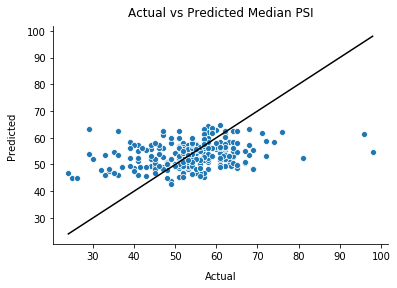

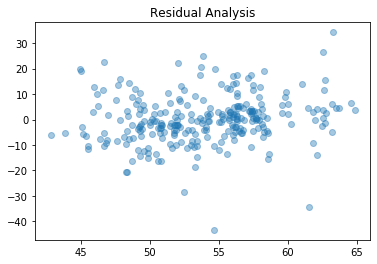

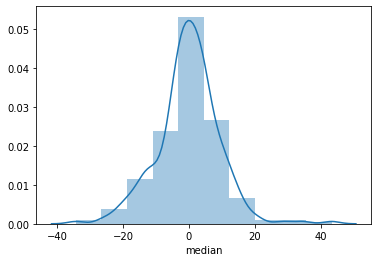

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
#lm = RandomForestRegressor()

lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)

# Input code here:

print("Train score:")
print(lm.score(X_train,y_train))

print("Test score:")
print(lm.score(X_test,y_test))

print("RMSE")
print(np.sqrt(mean_squared_error(y_test, y_predict)))

plt.title("Actual vs Predicted Median PSI", pad = 10)
plt.xlabel("Actual", labelpad = 10)
plt.ylabel("Predicted", labelpad = 10)
sns.scatterplot(y_test, y_predict)
sns.lineplot((y_test.min(),y_test.max()), (y_test.min(),y_test.max()), color = 'black')
sns.despine()
plt.xlabel("Actual", labelpad = 10)
plt.show()

residuals = y_predict - y_test
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()

predictions = lm.predict(X_test)
sns.distplot((y_test-predictions),bins=10);

In [0]:
psi_df_all_rain=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/rainfall_month.csv')
rainfall_months=["no_of_rainy_days","month"]
psi_df_all_rain = psi_df_all_rain[rainfall_months]

psi_df_all_rain.head(100)

,no_of_rainy_days,month
0,15,2016-01
1,10,2016-02
2,6,2016-03
3,14,2016-04
4,12,2016-05
5,13,2016-06
6,20,2016-07
7,15,2016-08
8,15,2016-09
9,16,2016-10


In [0]:

def left(s, amount):
    return s[:amount]

def right(s, amount):
    return s[-amount:]


months_process= []
years_process=[]
months_process = right(psi_df_all_rain["month"].str,2)
years_process= left(psi_df_all_rain["month"].str,4)

df_all_rain=pd.DataFrame()
df_all_rain["month"]= months_process
df_all_rain["year"]= years_process
df_all_rain["date"]= psi_df_all_rain["month"]
df_all_rain["month_process"]= pd.to_numeric(df_all_rain["month"])
#df_all_rain.loc[ df_all_rain["month"] not in ['11','12'], 'month_process' ] = int(right(df_all_rain["month"].str,1))
#df_all_rain.loc[ df_all_rain.month in ['11','12'], 'month_process' ] = int(psi_df_all_rain["month"])
df_all_rain["rainy_days"]=psi_df_all_rain["no_of_rainy_days"]
df_all_rain.head(100)

,month,year,date,month_process,rainy_days
0,01,2016,2016-01,1,15
1,02,2016,2016-02,2,10
2,03,2016,2016-03,3,6
3,04,2016,2016-04,4,14
4,05,2016,2016-05,5,12
5,06,2016,2016-06,6,13
6,07,2016,2016-07,7,20
7,08,2016,2016-08,8,15
8,09,2016,2016-09,9,15
9,10,2016,2016-10,10,16


In [0]:
psi_df_all_indo=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/daily_psi_df_all_indo_5.csv')
psi_df_all_indo.head()

,timestamp,central,east,month,national,north,south,west,year,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,month_7,month_8,month_9,month_10,month_11,month_12,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,indo,indo_day,indo_week
0,2016-02-07 00:00:00+08:00,47.0,47.0,2.0,47.0,37.0,44.0,34.0,2016.0,44.4,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2016-02-08 00:00:00+08:00,57.0,59.0,2.0,59.0,54.0,57.0,56.0,2016.0,57.2,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2016-02-09 00:00:00+08:00,58.0,62.0,2.0,62.0,58.0,58.0,58.0,2016.0,59.6,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2016-02-10 00:00:00+08:00,55.0,59.0,2.0,59.0,53.0,54.0,54.0,2016.0,56.0,55.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2016-02-11 00:00:00+08:00,31.0,37.0,2.0,37.0,32.0,36.0,32.0,2016.0,34.6,36.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [0]:
psi_df_all_indo['month']=psi_df_all_indo['month'].fillna(0).astype(int)
psi_df_all_indo['year']=psi_df_all_indo['year'].fillna(0).astype(int)
df_all_rain['year']=df_all_rain['year'].fillna(0).astype(int)
df_all_rain['month_process']=df_all_rain['month_process'].fillna(0).astype(int)

df_rain_psi_indo_all = pd.merge(df_all_rain, psi_df_all_indo,  how='inner', left_on=['month_process','year'], right_on = ['month','year'])
df_rain_psi_indo_all.head(10)

,month_x,year,date,month_process,rainy_days,timestamp,central,east,month_y,national,north,south,west,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,month_7,month_8,month_9,month_10,month_11,month_12,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,indo,indo_day,indo_week
0,02,2016,2016-02,2,10,2016-02-07 00:00:00+08:00,47.0,47.0,2,47.0,37.0,44.0,34.0,44.4,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,02,2016,2016-02,2,10,2016-02-08 00:00:00+08:00,57.0,59.0,2,59.0,54.0,57.0,56.0,57.2,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,02,2016,2016-02,2,10,2016-02-09 00:00:00+08:00,58.0,62.0,2,62.0,58.0,58.0,58.0,59.6,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,02,2016,2016-02,2,10,2016-02-10 00:00:00+08:00,55.0,59.0,2,59.0,53.0,54.0,54.0,56.0,55.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,02,2016,2016-02,2,10,2016-02-11 00:00:00+08:00,31.0,37.0,2,37.0,32.0,36.0,32.0,34.6,36.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5,02,2016,2016-02,2,10,2016-02-12 00:00:00+08:00,37.0,40.0,2,40.0,32.0,36.0,34.0,36.8,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6,02,2016,2016-02,2,10,2016-02-13 00:00:00+08:00,47.0,40.0,2,47.0,37.0,46.0,35.0,43.6,46.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
7,02,2016,2016-02,2,10,2016-02-14 00:00:00+08:00,36.0,43.0,2,43.0,41.0,34.0,36.0,39.2,41.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8,02,2016,2016-02,2,10,2016-02-15 00:00:00+08:00,51.0,51.0,2,51.0,46.0,50.0,42.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
9,02,2016,2016-02,2,10,2016-

In [0]:
df_rain_psi_indo_all.to_csv('rain_psi_indo_all.csv')
from google.colab import files
files.download('rain_psi_indo_all.csv')

In [0]:
#cleaning
df_rain_psi_indo_all['indo'] = df_rain_psi_indo_all['indo'].replace('-', np.nan)
df_rain_psi_indo_all['indo'] = df_rain_psi_indo_all['indo'].astype(float)
df_rain_psi_indo_all.dropna(inplace=True)

In [0]:
#cleaning
df_rain_psi_indo_all['indo_day'] = df_rain_psi_indo_all['indo_day'].replace('-', np.nan)
df_rain_psi_indo_all['indo_day'] = df_rain_psi_indo_all['indo_day'].astype(float)
df_rain_psi_indo_all.dropna(inplace=True)

In [0]:
#cleaning
df_rain_psi_indo_all['indo_week'] = df_rain_psi_indo_all['indo_week'].replace('-', np.nan)
df_rain_psi_indo_all['indo_week'] = df_rain_psi_indo_all['indo_week'].astype(float)
df_rain_psi_indo_all.dropna(inplace=True)

In [0]:
df_rain_psi_indo_all.head(10)


,month_x,year,date,month_process,rainy_days,timestamp,central,east,month_y,national,north,south,west,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,month_7,month_8,month_9,month_10,month_11,month_12,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,indo,indo_day,indo_week
819,05,2018,2018-05,5,19,2018-05-20 00:00:00+08:00,81.0,74.0,5,82.0,72.0,81.0,56.0,78.4,80.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,141.0,135.0
865,07,2018,2018-07,7,10,2018-07-05 00:00:00+08:00,52.0,47.0,7,53.0,47.0,53.0,46.0,50.6,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.0,115.0,143.0
866,07,2018,2018-07,7,10,2018-07-06 00:00:00+08:00,59.0,60.0,7,64.0,58.0,64.0,58.0,61.2,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.0,92.0,127.0
867,07,2018,2018-07,7,10,2018-07-07 00:00:00+08:00,55.0,55.0,7,58.0,55.0,58.0,55.0,56.0,56.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,141.0,131.0
868,07,2018,2018-07,7,10,2018-07-08 00:00:00+08:00,54.0,55.0,7,55.0,54.0,55.0,53.0,54.6,55.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141.0,144.0,148.0
869,07,2018,2018-07,7,10,2018-07-09 00:00:00+08:00,51.0,52.0,7,53.0,49.0,53.0,49.0,51.8,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,130.0,88.0
870,07,2018,2018-07,7,10,2018-07-10 00:00:00+08:00,37.0,42.0,7,52.0,40.0,52.0,41.0,44.2,42.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,125.0,107.0
871,07,2018,2018-07,7,10,2018-07-11 00:00:00+08:00,46.0,34.0,7,52.0,51.0,52.0,37.0,47.2,51.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,143.0,142.0
872,07,2018,2018-07,7,10,2018-07-12 00:00:00+08:00,49.0,40.0,7,53.0,53.0,53.0,42.0,49.4,53.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [0]:
psi_df_all_indo.shape

(1376, 86)

In [0]:
psi_df_all_indo.isnull().sum()

timestamp             7
central              21
east                 21
month                 0
national             21
                   ... 
day_of_month_30      21
day_of_month_31      21
indo               1067
indo_day           1067
indo_week          1067
Length: 86, dtype: int64

In [0]:
#11 - 16: Days of the the week 
#17: Day
#40 - 51: Month
#52 - 82: Days of month
#83: Indo
X = psi_df_all_indo.iloc[:, [11,12,13,14,15,16,40,41,42,43,44,45,46,47,48,49,50,51,
                             52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84]].values
y = psi_df_all_indo.iloc[:, 10].values
#print(psi_df_all_indo.columns[84])

In [0]:
df_rain_psi_indo_all.head(10)


,month_x,year,date,month_process,rainy_days,timestamp,central,east,month_y,national,north,south,west,mean,median,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,month_7,month_8,month_9,month_10,month_11,month_12,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,day_of_month_12,day_of_month_13,day_of_month_14,day_of_month_15,day_of_month_16,day_of_month_17,day_of_month_18,day_of_month_19,day_of_month_20,day_of_month_21,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,indo,indo_day,indo_week
819,05,2018,2018-05,5,19,2018-05-20 00:00:00+08:00,81.0,74.0,5,82.0,72.0,81.0,56.0,78.4,80.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,141.0,135.0
865,07,2018,2018-07,7,10,2018-07-05 00:00:00+08:00,52.0,47.0,7,53.0,47.0,53.0,46.0,50.6,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.0,115.0,143.0
866,07,2018,2018-07,7,10,2018-07-06 00:00:00+08:00,59.0,60.0,7,64.0,58.0,64.0,58.0,61.2,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.0,92.0,127.0
867,07,2018,2018-07,7,10,2018-07-07 00:00:00+08:00,55.0,55.0,7,58.0,55.0,58.0,55.0,56.0,56.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,141.0,131.0
868,07,2018,2018-07,7,10,2018-07-08 00:00:00+08:00,54.0,55.0,7,55.0,54.0,55.0,53.0,54.6,55.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141.0,144.0,148.0
869,07,2018,2018-07,7,10,2018-07-09 00:00:00+08:00,51.0,52.0,7,53.0,49.0,53.0,49.0,51.8,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,130.0,88.0
870,07,2018,2018-07,7,10,2018-07-10 00:00:00+08:00,37.0,42.0,7,52.0,40.0,52.0,41.0,44.2,42.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,125.0,107.0
871,07,2018,2018-07,7,10,2018-07-11 00:00:00+08:00,46.0,34.0,7,52.0,51.0,52.0,37.0,47.2,51.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,143.0,142.0
872,07,2018,2018-07,7,10,2018-07-12 00:00:00+08:00,49.0,40.0,7,53.0,53.0,53.0,42.0,49.4,53.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [0]:
df_rain_psi_indo_all['indo_day'] = df_rain_psi_indo_all['indo_day'].replace('-', np.nan)
df_rain_psi_indo_all['indo_day'] = df_rain_psi_indo_all['indo_day'].astype(float)
df_rain_psi_indo_all.dropna(inplace=True)

In [0]:
#cleaning
df_rain_psi_indo_all['indo_week'] = df_rain_psi_indo_all['indo_week'].replace('-', np.nan)
df_rain_psi_indo_all['indo_week'] = df_rain_psi_indo_all['indo_week'].astype(float)
df_rain_psi_indo_all.dropna(inplace=True)

In [0]:
df_rain_psi_indo_all.columns

Index(['month_x', 'year', 'date', 'month_process', 'rainy_days', 'timestamp',
       'central', 'east', 'month_y', 'national', 'north', 'south', 'west',
       'mean', 'median', 'Friday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_month_1', 'day_of_month_2', 'day_of_month_3', 'day_of_month_4',
       'day_of_month_5', 'day_of_month_6', 'day_of_month_7', 'day_of_month_8',
       'day_of_month_9', 'day_of_month_10', 'day_of_month_11',
       'day_of_month_12', 'day_of_month_13', 'day_of_month_14',
       'day_of_month_15', 'day_of_month_16', 'day_of_month_17',
       'day_of_month_18', 'day_of_month_19', 'day_of_month_20',
       'day_of_month_21', 'day_of_month_22', 'day

In [0]:
df_rain_psi_indo_col = ['rainy_days', 'Friday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_month_1', 'day_of_month_2', 'day_of_month_3', 'day_of_month_4',
       'day_of_month_5', 'day_of_month_6', 'day_of_month_7', 'day_of_month_8',
       'day_of_month_9', 'day_of_month_10', 'day_of_month_11',
       'day_of_month_12', 'day_of_month_13', 'day_of_month_14',
       'day_of_month_15', 'day_of_month_16', 'day_of_month_17',
       'day_of_month_18', 'day_of_month_19', 'day_of_month_20',
       'day_of_month_21', 'day_of_month_22', 'day_of_month_23',
       'day_of_month_24', 'day_of_month_25', 'day_of_month_26',
       'day_of_month_27', 'day_of_month_28', 'day_of_month_29',
       'day_of_month_30', 'day_of_month_31', 'indo', 'indo_day', 'indo_week']

X = df_rain_psi_indo_all[df_rain_psi_indo_col]
y = df_rain_psi_indo_all['median']

In [0]:
#4: rainy days
#13: mean
#15 - 20: day of week
#44-55: month
#56 - 86: day of month
#87: indo
X = df_rain_psi_indo_all.iloc[:, [4, 15,16,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,
                                  56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,89]].values
y = df_rain_psi_indo_all.iloc[:, 13].values
print(df_rain_psi_indo_all.columns[89])
#trying indo lag by week

indo_week


Train score:
0.67126838650863
Test score:
0.3228860030386531


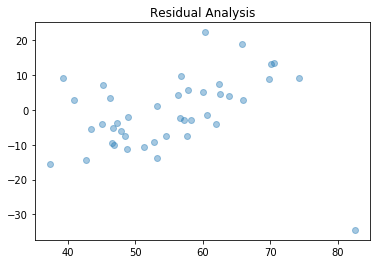

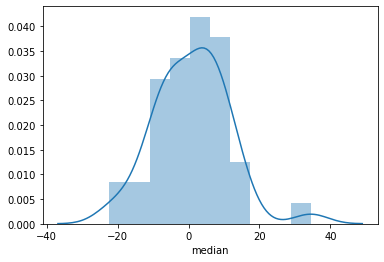

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)

# Input code here:

print("Train score:")
print(lm.score(X_train,y_train))

print("Test score:")
print(lm.score(X_test,y_test))

residuals = y_predict - y_test
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()

predictions = lm.predict(X_test)
sns.distplot((y_test-predictions),bins=10);

Train score:
0.67126838650863
Test score:
0.3228860030386531


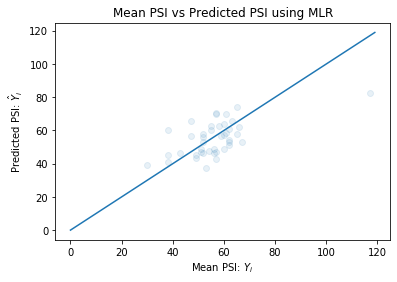

In [0]:

model = lm.fit(X_train, y_train)

y_predict= lm.predict(X_test)

print("Train score:")
print(lm.score(X_train, y_train))

print("Test score:")
print(lm.score(X_test, y_test))

plt.scatter(y_test, y_predict, alpha=0.1)
plt.plot(range(120), range(120))

plt.xlabel("Mean PSI: $Y_i$")
plt.ylabel("Predicted PSI: $\hat{Y}_i$")
plt.title("Mean PSI vs Predicted PSI using MLR")

plt.show()

In [0]:
from sklearn import metrics

print('MLR METRICS')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MLR METRICS
Mean Absolute Error: 8.214130339999295
Mean Squared Error: 106.68767818335415
Root Mean Squared Error: 10.328972755475451


KNR training set score: 1.0
KNR test set score: -0.11634436677849158


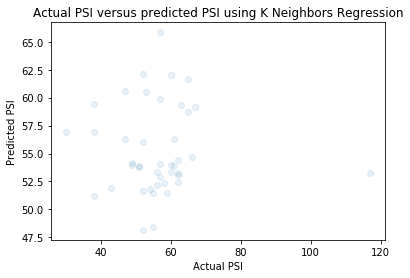

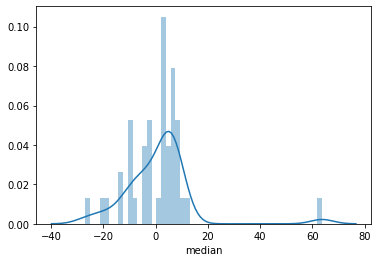

In [0]:
from sklearn.neighbors import KNeighborsRegressor

kn_regressor = KNeighborsRegressor(n_neighbors = 8, weights = "distance")
kn_regressor.fit(X_train, y_train)

knr_training_score = kn_regressor.score(X_train, y_train)

print("KNR training set score: %s" %(knr_training_score))

knr_test_score = kn_regressor.score(X_test, y_test)

print("KNR test set score: %s" %(knr_test_score))

#generate plot showing difference between predicted age and actual age using K Neighbors Regressor

knr_predictions = kn_regressor.predict(X_test)

plt.scatter(y_test, knr_predictions,  alpha=0.1)
plt.title("Actual PSI versus predicted PSI using K Neighbors Regression")
plt.xlabel("Actual PSI")
plt.ylabel("Predicted PSI")
plt.show()

sns.distplot((y_test-knr_predictions),bins=50);

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


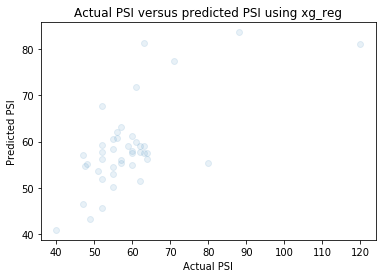

xgboost training set score: 0.9591015118266071
xgboost test set score: 0.44169787150827056


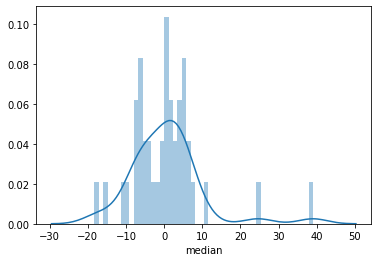

In [0]:
#xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

plt.scatter(y_test, preds, alpha=0.1)
plt.title("Actual PSI versus predicted PSI using xg_reg")
plt.xlabel("Actual PSI")
plt.ylabel("Predicted PSI")
plt.show()
sns.distplot((y_test-preds),bins=50);

xg_training_score = xg_reg.score(X_train, y_train)

print("xgboost training set score: %s" %(xg_training_score))

xg_test_score = xg_reg.score(X_test, y_test)

print("xgboost test set score: %s" %(xg_test_score))


In [0]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9.475084


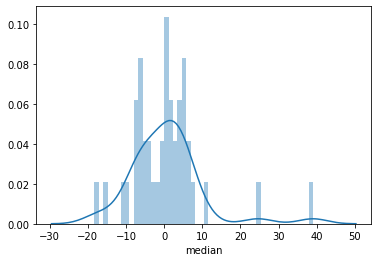

In [0]:
sns.distplot((y_test-preds),bins=50);

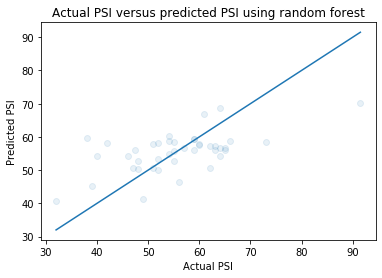

rf training set score: 0.9202754608032009
rf test set score: 0.3494779039807616
rf RMSE: 8.288644268487085


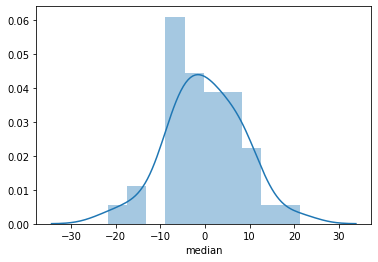

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

plt.scatter(y_test, y_predict, alpha=0.1)
plt.title("Actual PSI versus predicted PSI using random forest")
plt.xlabel("Actual PSI")
plt.ylabel("Predicted PSI")
plt.plot((y_test.min(), y_test.max()),(y_test.min(), y_test.max()))
plt.show()
sns.distplot((y_test-y_predict),bins=10);

rf_training_score = regressor.score(X_train, y_train)

print("rf training set score: %s" %(rf_training_score))

rf_test_score = regressor.score(X_test, y_test)

print("rf test set score: %s" %(rf_test_score))

print("rf RMSE: %s" %(np.sqrt(mean_squared_error(y_test, y_predict))))

In [0]:
from sklearn import metrics
print('RF METRICS')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

RF METRICS
Mean Absolute Error: 6.503333333333333
Mean Squared Error: 68.70162380952381
Root Mean Squared Error: 8.288644268487085


In [0]:
print('Training Features Shape:', X.shape)
print('Training Labels Shape:', X_train.shape)
print('Testing Features Shape:', y.shape)
print('Testing Labels Shape:', y_train.shape)

Training Features Shape: (207, 74)
Training Labels Shape: (165, 74)
Testing Features Shape: (207,)
Testing Labels Shape: (165,)


RF RESIDUALS


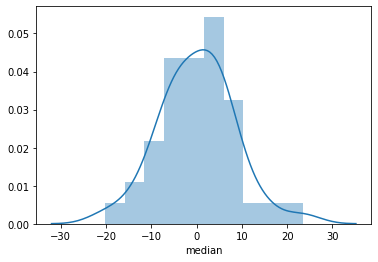

In [0]:
# Use the forest's predict method on the test data
print('RF RESIDUALS')
y_predict = regressor.predict(X_test)
y_test=y_test.astype(float)
residuals = y_predict - y_test
import matplotlib.pyplot as plt

sns.distplot((residuals),bins=10);

In [0]:
#evaluation metrics
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor as rf
predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.398
Test data R-2 score: 0.368
Test data Spearman correlation: 0.521
Test data Pearson correlation: 0.607


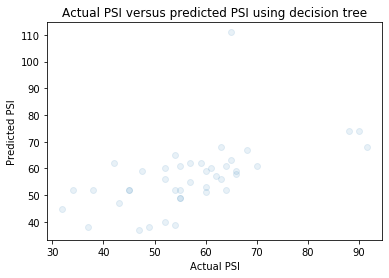

11.941823263519808


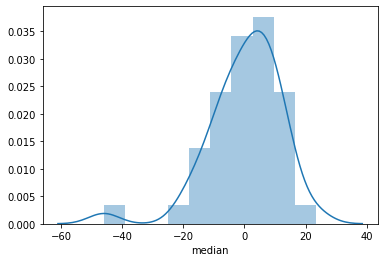

In [0]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
#regressor.fit(X, y) 

regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)

plt.scatter(y_test, y_predict, alpha=0.1)
plt.title("Actual PSI versus predicted PSI using decision tree")
plt.xlabel("Actual PSI")
plt.ylabel("Predicted PSI")
plt.show()
sns.distplot((y_test-y_predict),bins=10);

#dt_training_score = regressor.score(regressor.predict(X_train), y_train)

#print("dt training set score: %s" %(dt_training_score))

#dt_test_score = regressor.score(y_predict, y_test)

#print("dt test set score: %s" %(dt_test_score))

print(np.sqrt(mean_squared_error(y_test, y_predict)))

In [0]:
#evaluation metrics
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data R-2 score: -0.791
Test data Spearman correlation: 0.0872
Test data Pearson correlation: 0.131


In [0]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',model_score)
y_predict = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predict))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predict))


coefficient of determination R^2 of the prediction.:  0.18109389259306763
Mean squared error: 69.05
Test Variance score: 0.15


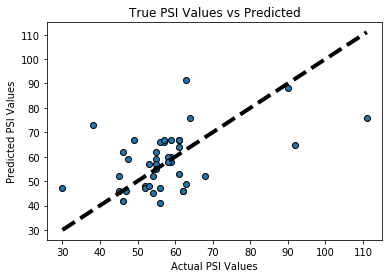

In [0]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual PSI Values')
ax.set_ylabel('Predicted PSI Values')
ax.set_title("True PSI Values vs Predicted")
plt.show()

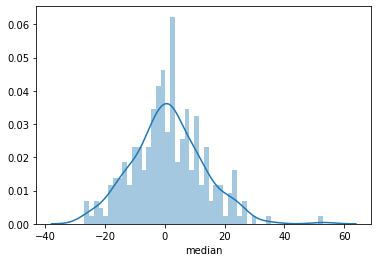

In [0]:
# Use the forest's predict method on the test data
y_predict = regressor.predict(X_test)
y_test=y_test.astype(float)
residuals = y_predict - y_test
import matplotlib.pyplot as plt

sns.distplot((residuals),bins=50);

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

ValueError: ignored

In [0]:
from datetime import datetime

datetime_str = '09/19/18 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)  # printed in default format

<class 'datetime.datetime'>
2018-09-19 13:55:26


In [0]:
#need to add the columns mean and median pm2.5 to each dataset
#create columns for hourly median PSI for each year
#for 2016
psi_df_2016['median']=psi_df_2016.median(axis = 1, skipna = True) 
psi_df_2016['mean']=psi_df_2016[x].mean(axis=1, skipna=True )
#for 2017
psi_df_2017['median']=psi_df_2017.median(axis = 1, skipna = True) 
psi_df_2017['mean']=psi_df_2017[x].mean(axis=1, skipna=True )
#for 2018
psi_df_2018['median']=psi_df_2018.median(axis = 1, skipna = True) 
psi_df_2018['mean']=psi_df_2018[x].mean(axis=1, skipna=True )
#for 2019
psi_df_2019['median']=psi_df_2019.median(axis = 1, skipna = True) 
psi_df_2019['mean']=psi_df_2019[x].mean(axis=1, skipna=True )

In [0]:
psi_df_all.head(10)

,central,east,month,national,north,south,timestamp,west,year,mean,median,day
0,47,47,2,47,37,44,2016-02-07T18:00:00+08:00,34,2016,44.4,47.0,Sunday
1,57,59,2,59,54,57,2016-02-08T23:00:00+08:00,56,2016,57.2,57.0,Monday
2,57,59,2,59,55,57,2016-02-09T01:00:00+08:00,56,2016,57.4,57.0,Tuesday
3,56,59,2,59,55,57,2016-02-09T02:00:00+08:00,56,2016,57.2,57.0,Tuesday
4,56,59,2,59,55,58,2016-02-09T03:00:00+08:00,56,2016,57.4,58.0,Tuesday
5,56,59,2,59,55,58,2016-02-09T04:00:00+08:00,56,2016,57.4,58.0,Tuesday
6,57,59,2,59,55,58,2016-02-09T05:00:00+08:00,56,2016,57.6,58.0,Tuesday
7,57,60,2,60,55,58,2016-02-09T06:00:00+08:00,56,2016,58.0,58.0,Tuesday
8,57,60,2,60,56,58,2016-02-09T07:00:00+08:00,56,2016,58.2,58.0,Tuesday
9,57,61,2,61,57,58,2016-02-09T08:00:00+08:00,56,2016,58.8,58.0,Tuesday


/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


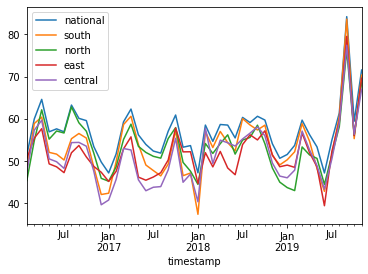

In [0]:
x = ['national', 'south', 'north', 'east', 'central', 'timestamp'] 
psi_df_all["timestamp"] = pd.to_datetime(psi_df_all['timestamp'])
psi_df_all.set_index("timestamp")
y_season = psi_df_all[x].resample('MS', on='timestamp').mean()

y_season
y_season.plot()

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


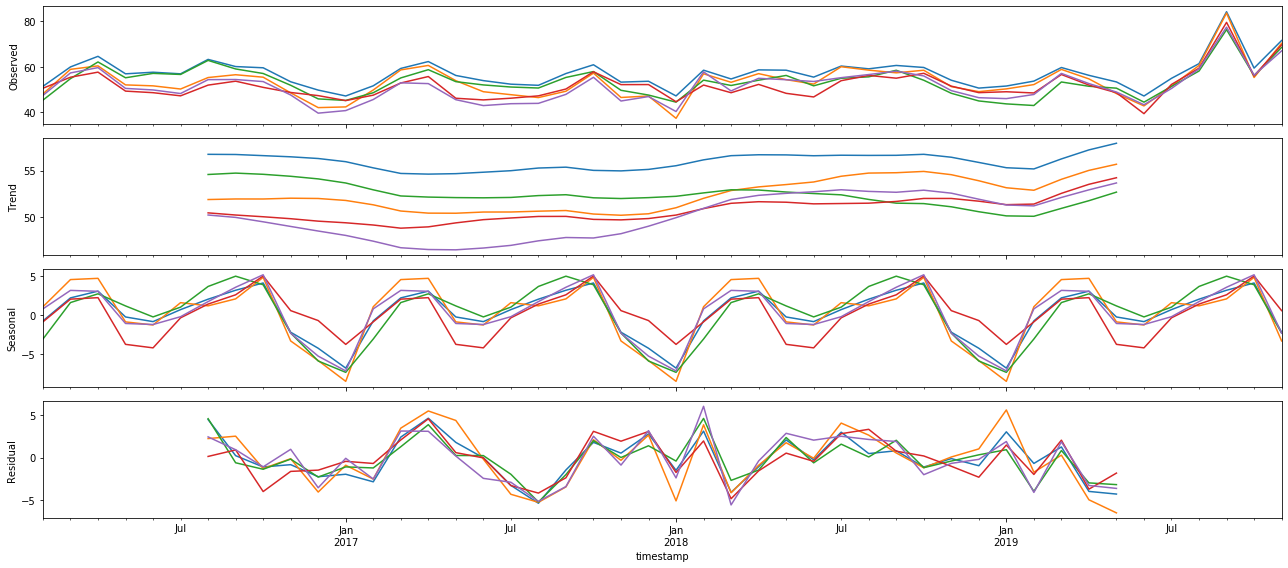

In [0]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8


decomposition = sm.tsa.seasonal_decompose(y_season, model='additive')
fig = decomposition.plot()

plt.show()

In [0]:
central_diff= y_season['central'].diff(periods=1)
central_diff= central_diff[1:]
central_diff.head(10)
central_diff.mean()
#central_diff.plot()

0.4343524038566737

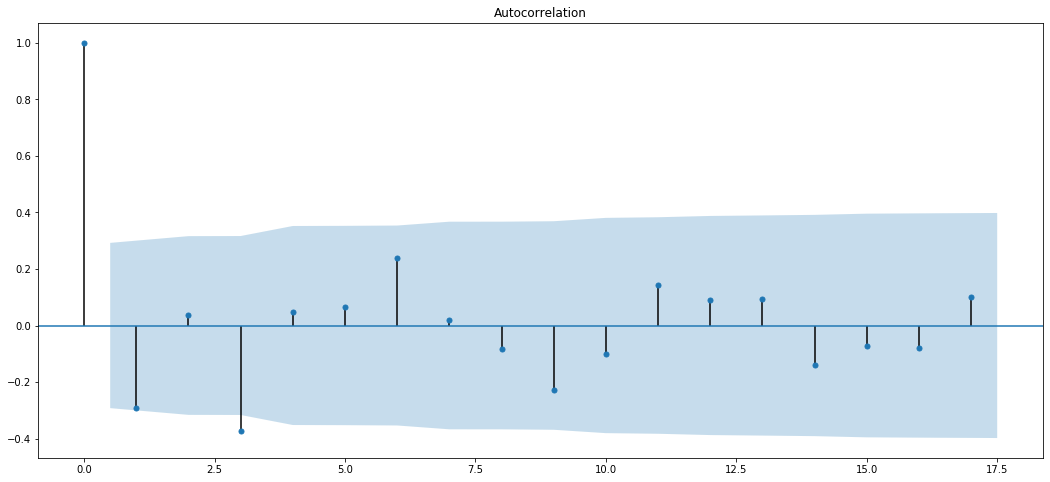

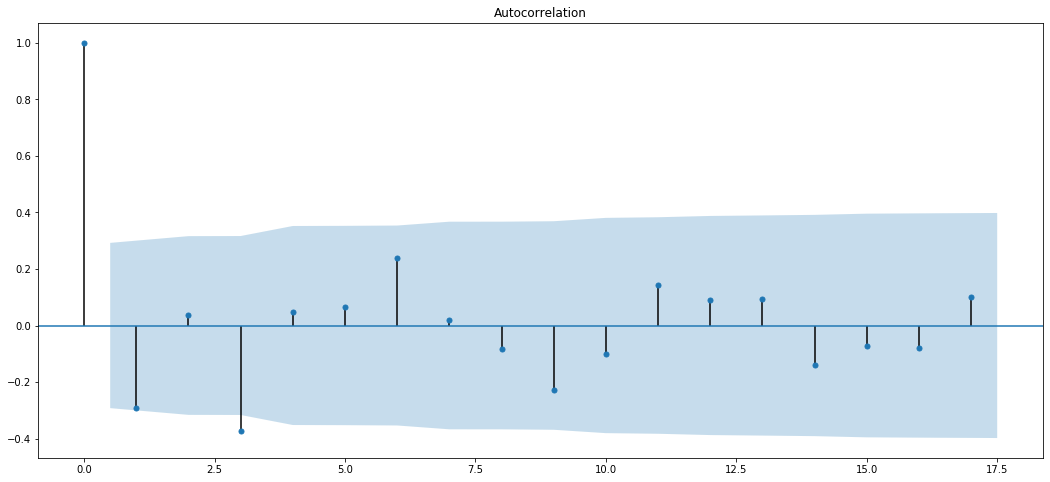

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(y_season['central'])
plot_acf(central_diff)
# want to ensure stationarity (seems like first difference is more stationary - might pick ARIMA afterall)

In [0]:
AR_train = y_season['central'][:30]
AR_test = y_season['central'][30:]

AR_train.head(100)

timestamp
2016-02-01 00:00:00+08:00    47.461894
2016-03-01 00:00:00+08:00    57.331746
2016-04-01 00:00:00+08:00    59.666016
2016-05-01 00:00:00+08:00    50.530806
2016-06-01 00:00:00+08:00    49.853395
2016-07-01 00:00:00+08:00    48.279389
2016-08-01 00:00:00+08:00    54.378261
2016-09-01 00:00:00+08:00    54.433230
2016-10-01 00:00:00+08:00    53.526393
2016-11-01 00:00:00+08:00    47.638889
2016-12-01 00:00:00+08:00    39.661905
2017-01-01 00:00:00+08:00    40.784343
2017-02-01 00:00:00+08:00    45.644940
2017-03-01 00:00:00+08:00    52.980085
2017-04-01 00:00:00+08:00    52.636943
2017-05-01 00:00:00+08:00    45.564774
2017-06-01 00:00:00+08:00    42.984568
2017-07-01 00:00:00+08:00    43.810127
2017-08-01 00:00:00+08:00    43.960729
2017-09-01 00:00:00+08:00    47.910015
2017-10-01 00:00:00+08:00    55.409537
2017-11-01 00:00:00+08:00    44.992636
2017-12-01 00:00:00+08:00    46.944993
2018-01-01 00:00:00+08:00    40.374644
2018-02-01 00:00:00+08:00    57.785832
2018-03-01 00:0

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(AR_train)
model_ar_fit = model_ar.fit()

predictions= model_ar_fit.predict(start=30, end=46)

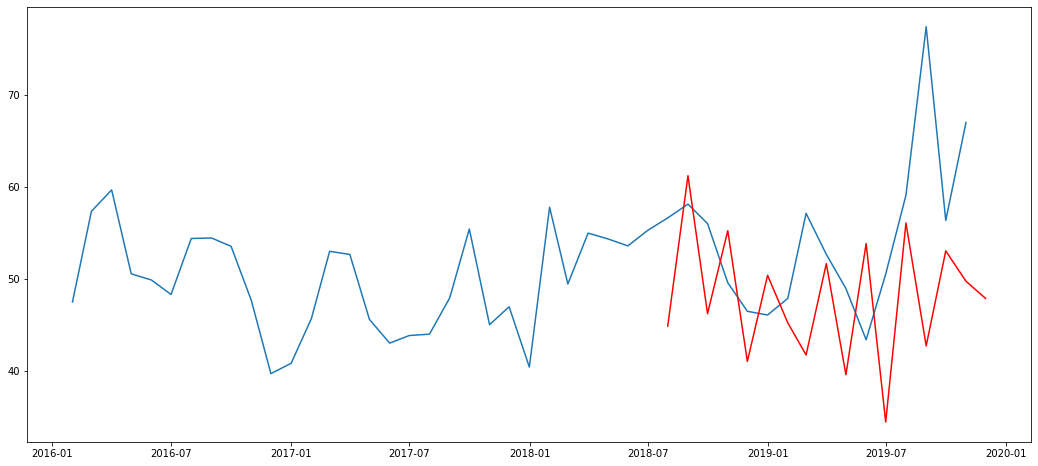

In [0]:
plt.plot(y_season['central'])
plt.plot(predictions, color='red')
#results if we used a regular AR model

In [0]:
np.sqrt(mean_squared_error(y_season['central'][29:], predictions))

10.880772091618526

In [0]:
#use a “grid search” to find the optimal set of parameters that yields the best performance for our model
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(y_season['central'],
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
            
#            results = mod.fit()
#            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue

In [0]:
#from the grid search, ARIMA(1,1,0)x(1,1,1,0,12) yields the lowest AIC value of 143.1, therefore it is the optimal option
mod = sm.tsa.statespace.SARIMAX(y_season['central'],
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False, 
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5802      0.217     -2.678      0.007      -1.005      -0.156
ar.S.L12      -0.5685      0.382     -1.488      0.137      -1.318       0.181
sigma2        55.5289     15.886      3.496      0.000      24.393      86.664


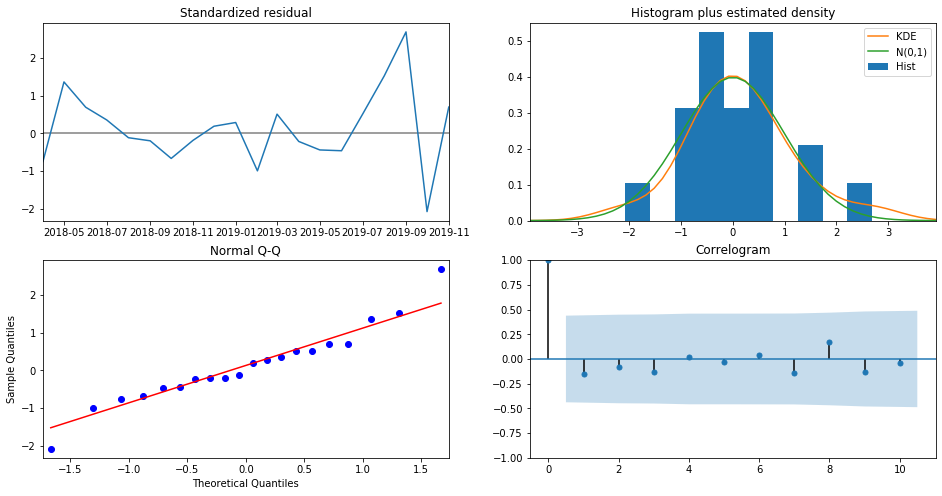

In [0]:
#model diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


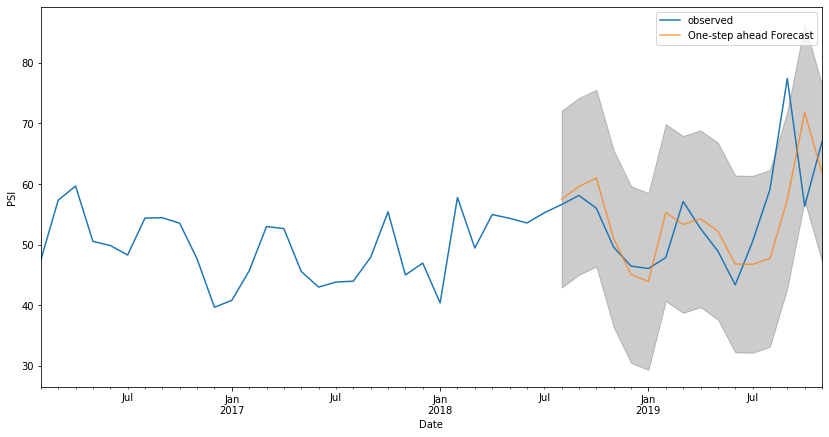

In [0]:
pred = results.get_prediction(start=30, dynamic=False)
pred_ci = pred.conf_int()
ax = y_season['central'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('PSI')
plt.legend()
plt.show()

In [0]:
np.sqrt(mean_squared_error(pred.predicted_mean, y_season['central'][-16:]))

7.676273571256376

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


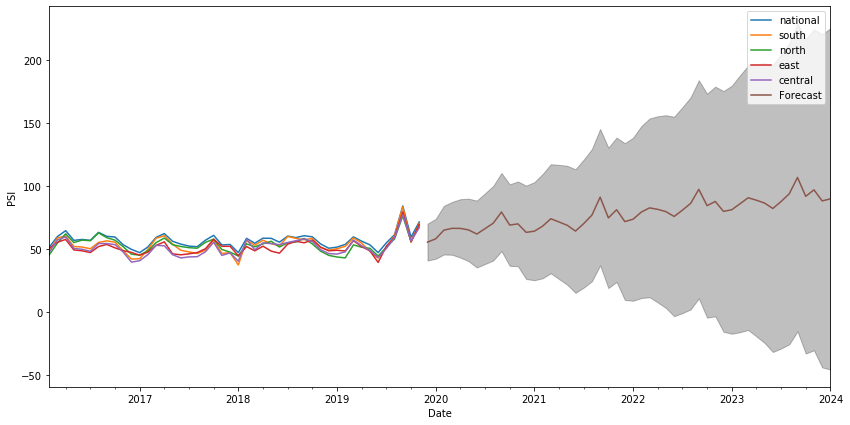

In [0]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y_season.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('PSI')
plt.legend()
plt.show()

In [0]:
#check dataset after addition of mean and median columns
psi_df_2016.head()

,national,south,north,east,central,west,timestamp,year,month,mean,median,day
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00,2016,2,44.4,45.7,Sunday
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00,2016,2,57.2,57.0,Monday
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00,2016,2,57.4,57.0,Tuesday
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00,2016,2,57.2,57.0,Tuesday
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00,2016,2,57.4,57.7,Tuesday


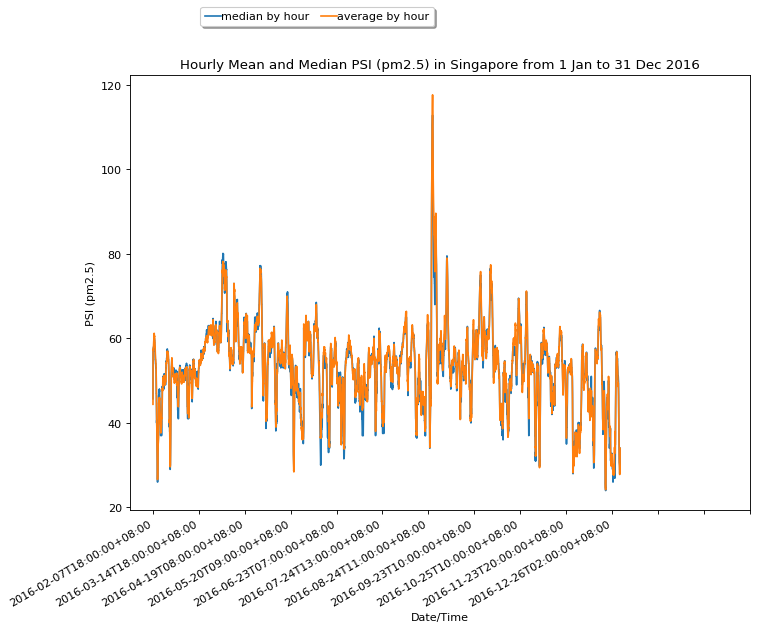

In [0]:
#visualization of hourly PSI for each year, generate subplots such that we can visualize all four years
#will have to fix x-axis labels first before visualizing subplots
#2016
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(psi_df_2016['timestamp'],psi_df_2016['median'], label='median by hour')
plt.plot(psi_df_2016['timestamp'],psi_df_2016['mean'], label='average by hour')
plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
# A hacky way to do it but basically (0 start, 9000 is the number of entries, and 672 is the skips)
plt.xticks(np.arange(0, 9000, 672)) 
# Add title and axis names
plt.title('Hourly Mean and Median PSI (pm2.5) in Singapore from 1 Jan to 31 Dec 2016')
plt.xlabel('Date/Time')
plt.ylabel('PSI (pm2.5)')

plt.show()

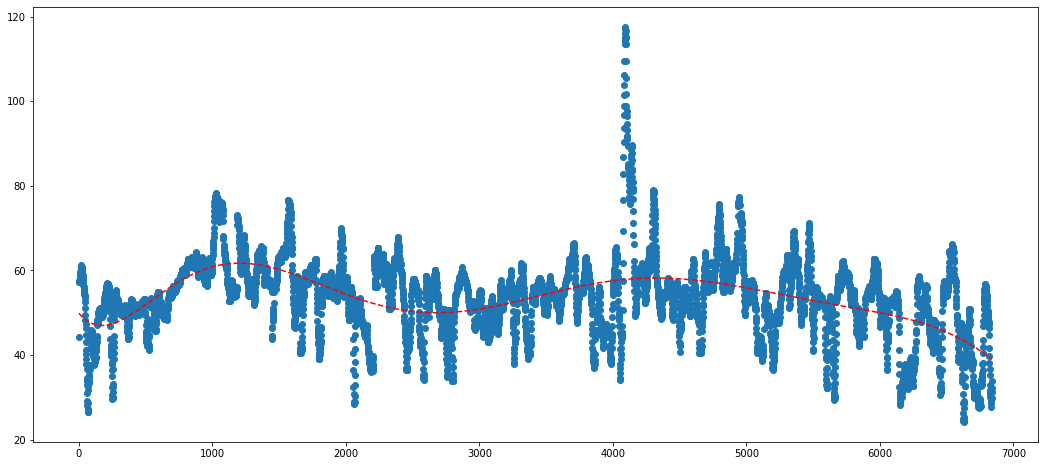

In [0]:
import datetime

data = psi_df_2016[['mean', 'timestamp']]
#x = datetime.datetime.strptime(data['timestamp'], "%Y-%m-%dT%H:%M:%W+08:00")  
#datetime_example = datetime.datetime.strptime(example, "%Y-%m-%dT%H:%M:%W+08:00")
#datetime_example
x = [i for i in range(len(data['timestamp']))]

y = data['mean']
plt.scatter(x, y)

z = np.polyfit(x, y, 8)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [0]:
indo_df=pd.read_csv('/content/drive/My Drive/Uplevel PSI Prediction/Indonesia_PSI_updated.csv')
print(indo_df)


    timestamp  PSI  Unnamed: 2  ...  Unnamed: 52  Unnamed: 53  Unnamed: 54
0    1-May-18    -         NaN  ...          NaN          NaN          NaN
1    2-May-18    -         NaN  ...          NaN          NaN          NaN
2    3-May-18    -         NaN  ...          NaN          NaN          NaN
3    4-May-18    -         NaN  ...          NaN          NaN          NaN
4    5-May-18    -         NaN  ...          NaN          NaN          NaN
..        ...  ...         ...  ...          ...          ...          ...
604       NaN  NaN         NaN  ...          NaN          NaN          NaN
605       NaN  NaN         NaN  ...          NaN          NaN          NaN
606       NaN  NaN         NaN  ...          NaN          NaN          NaN
607       NaN  NaN         NaN  ...          NaN          NaN          NaN
608       NaN  NaN         NaN  ...          NaN          NaN          NaN

[609 rows x 55 columns]


In [0]:
#need to change timestamp to same format as current datasets


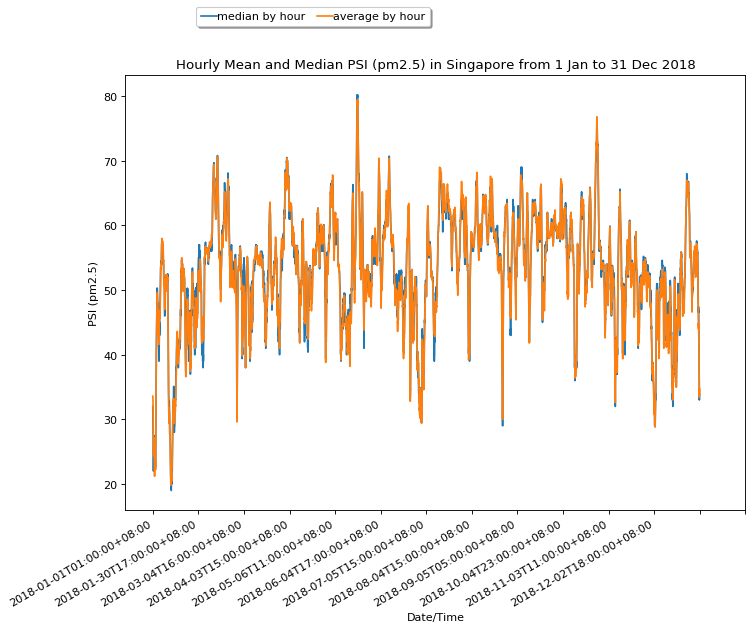

In [0]:
#visualization of hourly PSI for each year, generate subplots such that we can visualize all four years

#2018
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(psi_df_2018['timestamp'],psi_df_2018['median'], label='median by hour')
plt.plot(psi_df_2018['timestamp'],psi_df_2018['mean'], label='average by hour')
plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xticks(np.arange(0, 9000, 672)) 
# Add title and axis names
plt.title('Hourly Mean and Median PSI (pm2.5) in Singapore from 1 Jan to 31 Dec 2018')
plt.xlabel('Date/Time')
plt.ylabel('PSI (pm2.5)')
plt.show()

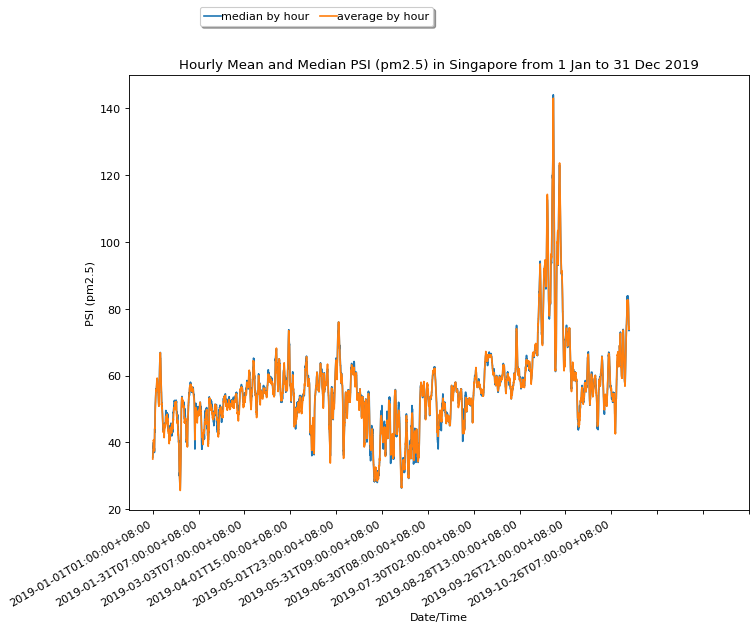

In [0]:
#visualization of hourly PSI for each year, generate subplots such that we can visualize all four years

#2019
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(psi_df_2019['timestamp'],psi_df_2019['median'], label='median by hour')
plt.plot(psi_df_2019['timestamp'],psi_df_2019['mean'], label='average by hour')
plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xticks(np.arange(0, 9000, 672)) 
# Add title and axis names
plt.title('Hourly Mean and Median PSI (pm2.5) in Singapore from 1 Jan to 31 Dec 2019')
plt.xlabel('Date/Time')
plt.ylabel('PSI (pm2.5)')
plt.show()

In [0]:
#to generate plots by day
#resampling by week
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

#resample daily for 2016
daily_psi_2016 = psi_df_2016
daily_psi_2016["timestamp"] = pd.to_datetime(daily_psi_2016["timestamp"])
type(daily_psi_2016.timestamp[0])
daily_psi_2016.set_index("timestamp")
daily_psi_2016 = daily_psi_2016.resample('D', on='timestamp').median()

#resample daily for 2017
daily_psi_2017 = psi_df_2017
daily_psi_2017["timestamp"] = pd.to_datetime(daily_psi_2017["timestamp"])
type(daily_psi_2017.timestamp[0])
daily_psi_2017.set_index("timestamp")
daily_psi_2017 = daily_psi_2017.resample('D', on='timestamp').median()

#resample daily for 2018
daily_psi_2018 = psi_df_2018
daily_psi_2018["timestamp"] = pd.to_datetime(daily_psi_2018["timestamp"])
type(daily_psi_2018.timestamp[0])
daily_psi_2018.set_index("timestamp")
daily_psi_2018 = daily_psi_2018.resample('D', on='timestamp').median()

#resample daily for 2019
daily_psi_2019 = psi_df_2019
daily_psi_2019["timestamp"] = pd.to_datetime(daily_psi_2019["timestamp"])
type(daily_psi_2019.timestamp[0])
daily_psi_2019.set_index("timestamp")
daily_psi_2019 = daily_psi_2019.resample('D', on='timestamp').median()


In [0]:
#resampling by week

#resample weekly for 2016
weekly_psi_2016 = psi_df_2016
weekly_psi_2016["timestamp"] = pd.to_datetime(weekly_psi_2016["timestamp"])
type(weekly_psi_2016.timestamp[0])
weekly_psi_2016.set_index("timestamp")
weekly_psi_2016 = weekly_psi_2016.resample('W', on='timestamp').median()

#resample weekly for 2017
weekly_psi_2017 = psi_df_2017
weekly_psi_2017["timestamp"] = pd.to_datetime(weekly_psi_2017["timestamp"])
type(weekly_psi_2017.timestamp[0])
weekly_psi_2017.set_index("timestamp")
weekly_psi_2017 = weekly_psi_2017.resample('W', on='timestamp').median()

#resample weekly for 2018
weekly_psi_2018 = psi_df_2018
weekly_psi_2018["timestamp"] = pd.to_datetime(weekly_psi_2018["timestamp"])
type(weekly_psi_2018.timestamp[0])
weekly_psi_2018.set_index("timestamp")
weekly_psi_2018 = weekly_psi_2018.resample('W', on='timestamp').median()

#resample weekly for 2019
weekly_psi_2019 = psi_df_2019
weekly_psi_2019["timestamp"] = pd.to_datetime(weekly_psi_2019["timestamp"])
type(weekly_psi_2019.timestamp[0])
weekly_psi_2019.set_index("timestamp")
weekly_psi_2019 = weekly_psi_2019.resample('W', on='timestamp').median()


In [0]:
#resample monthly

#resample monthly for 2016
monthly_psi_2016 = psi_df_2016
monthly_psi_2016 = monthly_psi_2016.resample('M', on='timestamp').median()
monthly_psi_2016.head(10)

#resample monthly for 2017
monthly_psi_2017 = psi_df_2017
monthly_psi_2017 = monthly_psi_2017.resample('M', on='timestamp').median()
monthly_psi_2017.head(10)

#resample monthly for 2018
monthly_psi_2018 = psi_df_2018
monthly_psi_2018 = monthly_psi_2018.resample('M', on='timestamp').median()
monthly_psi_2018.head(10)

#resample monthly for 2019 
monthly_psi_2019 = psi_df_2019
monthly_psi_2019 = monthly_psi_2019.resample('M', on='timestamp').median()
monthly_psi_2019.head(10)


,west,national,east,central,south,north,year,month,mean,median
timestamp,,,,,,,,,,
2019-01-31 00:00:00+08:00,36,52,51,46,52,42,2019,1,48.0,49.10
2019-02-28 00:00:00+08:00,36,54,49,48,53,43,2019,2,49.6,50.80
2019-03-31 00:00:00+08:00,53,58,56,57,57,53,2019,3,56.3,56.50
2019-04-30 00:00:00+08:00,52,57,54,55,56,52,2019,4,54.8,54.75
2019-05-31 00:00:00+08:00,46,54,52,52,51,53,2019,5,52.2,52.60
2019-06-30 00:00:00+08:00,39,48,36,43,41,45,2019,6,43.0,43.00
2019-07-31 00:00:00+08:00,53,54,53,52,52,52,2019,7,52.2,52.30
2019-08-31 00:00:00+08:00,58,60,59,58,60,57,2019,8,58.8,59.00
2019-09-30 00:00:00+08:00,74,76,73,73,75,71,2019,9,73.8,74.00


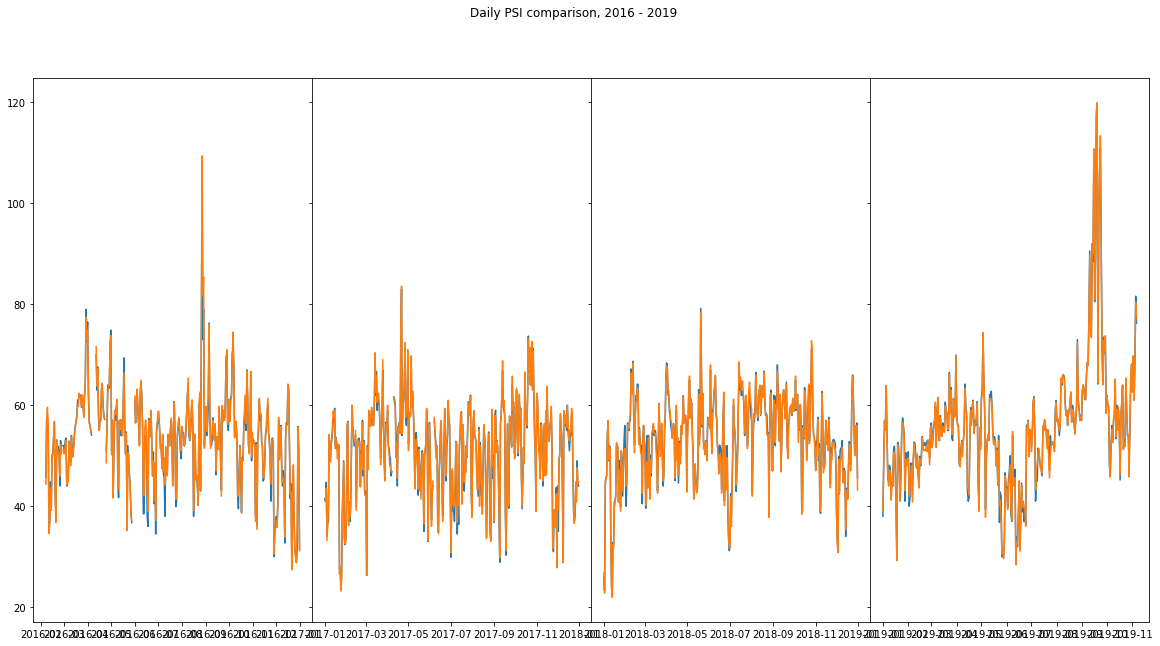

In [0]:
fig, axs = plt.subplots(1, 4, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (20,10))
(ax1), (ax2), (ax3), (ax4) = axs
fig.suptitle('Daily PSI comparison, 2016 - 2019')
ax1.plot(daily_psi_2016.index, daily_psi_2016["median"])
ax1.plot(daily_psi_2016.index, daily_psi_2016["mean"])
ax2.plot(daily_psi_2017.index, daily_psi_2017["median"])
ax2.plot(daily_psi_2017.index, daily_psi_2017["mean"])
ax3.plot(daily_psi_2018.index, daily_psi_2018["median"])
ax3.plot(daily_psi_2018.index, daily_psi_2018["mean"])
ax4.plot(daily_psi_2019.index, daily_psi_2019["median"])
ax4.plot(daily_psi_2019.index, daily_psi_2019["mean"])


for ax in axs.flat:
    ax.label_outer()


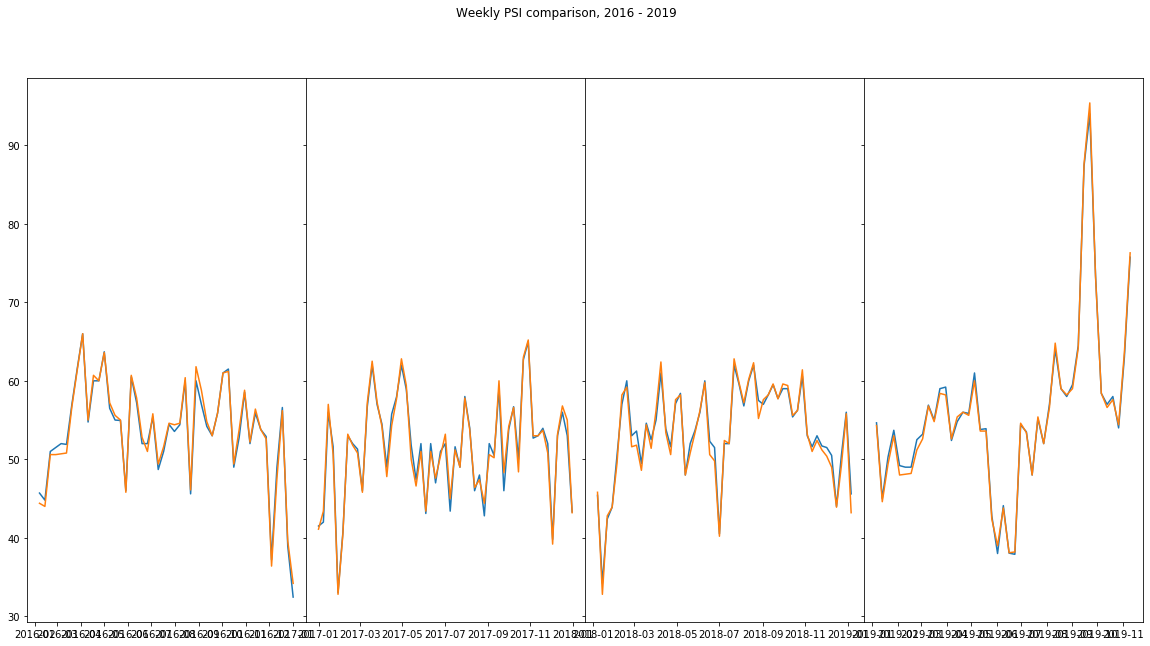

In [0]:
fig, axs = plt.subplots(1, 4, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (20,10))
(ax1), (ax2), (ax3), (ax4) = axs
fig.suptitle('Weekly PSI comparison, 2016 - 2019')
ax1.plot(weekly_psi_2016.index, weekly_psi_2016["median"])
ax1.plot(weekly_psi_2016.index, weekly_psi_2016["mean"])
ax2.plot(weekly_psi_2017.index, weekly_psi_2017["median"])
ax2.plot(weekly_psi_2017.index, weekly_psi_2017["mean"])
ax3.plot(weekly_psi_2018.index, weekly_psi_2018["median"])
ax3.plot(weekly_psi_2018.index, weekly_psi_2018["mean"])
ax4.plot(weekly_psi_2019.index, weekly_psi_2019["median"])
ax4.plot(weekly_psi_2019.index, weekly_psi_2019["mean"])

for ax in axs.flat:
    ax.label_outer()


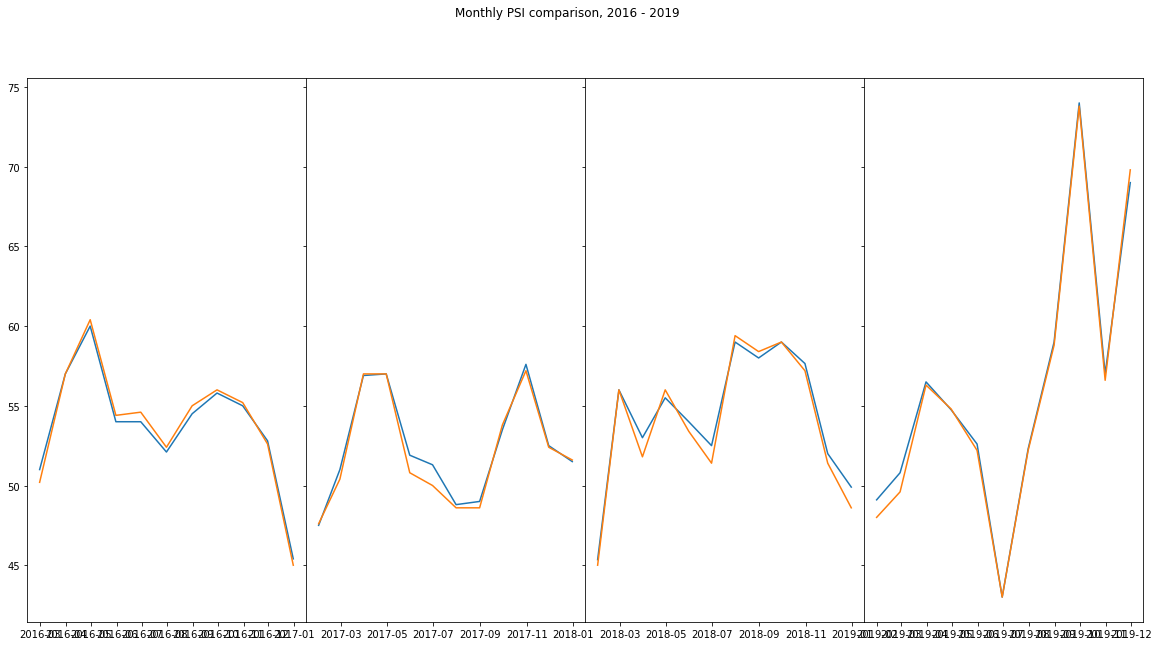

In [0]:
fig, axs = plt.subplots(1, 4, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (20,10))
(ax1), (ax2), (ax3), (ax4) = axs
fig.suptitle('Monthly PSI comparison, 2016 - 2019')
ax1.plot(monthly_psi_2016.index, monthly_psi_2016["median"])
ax1.plot(monthly_psi_2016.index, monthly_psi_2016["mean"])
ax2.plot(monthly_psi_2017.index, monthly_psi_2017["median"])
ax2.plot(monthly_psi_2017.index, monthly_psi_2017["mean"])
ax3.plot(monthly_psi_2018.index, monthly_psi_2018["median"])
ax3.plot(monthly_psi_2018.index, monthly_psi_2018["mean"])
ax4.plot(monthly_psi_2019.index, monthly_psi_2019["median"])
ax4.plot(monthly_psi_2019.index, monthly_psi_2019["mean"])

for ax in axs.flat:
    ax.label_outer()

#left to right: 2016, 2017, 2018, 2019
#blue: MEAN
#orange: MEDIAN

#should add legend/title for each individual plots

In [0]:
psi_df_2016.iloc[1]['timestamp'].weekday()

0

In [0]:
psi_df_2016.head()

,national,south,north,east,central,west,timestamp,year,month,mean,median,day
0,47,44,37,47,47,34,2016-02-07 18:00:00+08:00,2016,2,44.4,45.7,Sunday
1,59,57,54,59,57,56,2016-02-08 23:00:00+08:00,2016,2,57.2,57.0,Monday
2,59,57,55,59,57,56,2016-02-09 01:00:00+08:00,2016,2,57.4,57.0,Tuesday
3,59,57,55,59,56,56,2016-02-09 02:00:00+08:00,2016,2,57.2,57.0,Tuesday
4,59,58,55,59,56,56,2016-02-09 03:00:00+08:00,2016,2,57.4,57.7,Tuesday


In [0]:
weekday = [i.weekday() for i in psi_df_2016['timestamp']]

psi_df_2016['weekday'] = weekday

In [0]:
hour = [i.hour for i in psi_df_2016['timestamp']]

psi_df_2016['hour'] = hour

In [0]:
psi_df_2016.head()

,national,south,north,east,central,west,timestamp,year,month,mean,median,day,weekday,hour
0,47,44,37,47,47,34,2016-02-07 18:00:00+08:00,2016,2,44.4,45.7,Sunday,6,18
1,59,57,54,59,57,56,2016-02-08 23:00:00+08:00,2016,2,57.2,57.0,Monday,0,23
2,59,57,55,59,57,56,2016-02-09 01:00:00+08:00,2016,2,57.4,57.0,Tuesday,1,1
3,59,57,55,59,56,56,2016-02-09 02:00:00+08:00,2016,2,57.2,57.0,Tuesday,1,2
4,59,58,55,59,56,56,2016-02-09 03:00:00+08:00,2016,2,57.4,57.7,Tuesday,1,3
